Energia Interna:

In [1]:
import numpy as np
from numba import njit, jit

def internal_Energy(J, h, temperature):
    Z = ((1) + (np.exp((8 * J) / (temperature)) + (2 * np.cosh((2 * h) / (temperature)))))
    
    numerador = (np.exp((8*J)/temperature) + ((4*h)*np.sinh((2*h/temperature))))
    
    U = (((-1)*numerador)/Z)
    
    return U

In [7]:
import numpy as np
from numba import njit, jit

@njit
def internal_Energy(J, h, temperature):
    Z = ((1) + (np.exp((J) / (temperature)) + (2 * np.cosh((h) / (temperature)))))
    
    numerador = (np.exp((J)/temperature) + ((2*h)*np.sinh((h/temperature))))
    
    U = (((-1)*numerador)/Z)
    
    return U

Entropia $S(J,h,T)$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função S(T)
@njit
def S(J, h, T):
    Z = 1 + np.exp((8 * J) / T) + 2 * np.cosh((2 * h) / T)
    term1 = np.log(Z)
    numerator = (8 * J * np.exp((8 * J) / T)) + (4 * h * np.sinh((2 * h) / T))
    denominator = T * Z
    term2 = numerator / denominator
    entropia = (term1 - term2)
    return entropia

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função S(T)
@njit
def S(J, h, T):
    Z = ((1) + (np.exp((J) / (T)) + (2 * np.cosh((h) / (T)))))
    term1 = np.log(Z)
    numerator = (J * np.exp((J) / T)) + (2 * h * np.sinh((h) / T))
    denominator = T * Z
    term2 = numerator / denominator
    entropia = (term1 - term2)
    return entropia

Plotando S(T)

In [8]:



# Definir os intervalos de T
#T_values = np.linspace(0.001, 1, 10000)

# Definir os valores para h, K e J que serão usados nas plotagens
#h_values = 1
#J_values = 0.5
#S_values = np.zeros_like(T_values)

# Loop para calcular S(T) para cada combinação de h, K e J e plotar os resultados
#for h in h_values:
#    for K in K_values:
#        for J in J_values:
#            Ss[] = round(S(J, h, T_values), 5)
#            S_values = Ss
#            plt.plot(T_values, S_values, label=f'h = {h}, J = {J}')


#for i, T in enumerate(T_values):
#    S_values[i] = np.round(S(J_values, h_values, T), 5)

# Criar o gráfico
#plt.figure(figsize=(20, 10))

#plt.plot(T_values, S_values, label=f'h = {h}, J = {J}')


# Adicionar título e rótulos
#plt.title('Gráfico de S(T) para diferentes valores de h e J')
#plt.xlabel('T (Temperatura)')
#plt.ylabel('S (Entropia)')

# Incluir a equação no gráfico (opcional)
#equation_text = r'$S(T) = K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
#plt.text(6, 0.5, equation_text, fontsize=15, bbox=dict(facecolor='white', alpha=1))

# Exibir a grade, a legenda e o gráfico
#plt.grid(True)
#plt.legend()
#plt.show()


Magnétização $M(J, h, T)$

In [9]:
@njit
def Magnetized(ANTIFERROMAGNETIC_EXCHANGE_COUPLING, magnetic_field, temperature):
    
    Z = (                                                          
        1 + 
        np.exp((8 * ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature)) + 
        (
            2 * 
            np.cosh((2 * magnetic_field) / (temperature))
        )
    )
    
    term1 = (4*np.sinh((2*magnetic_field)/temperature))
    
    magnetizetion = term1/Z
    
    return magnetizetion
    
    

Plotando T(h, J, S). com S contanste, pois queremos o processo adiabático


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import os


#Definindo constantes
#BOLTZMANN = 1 # boltzmann constant -> Kb
#ANTIFERROMAGNETIC_EXCHANGE_COUPLING = 0.5 #J>=0
#ENTROPY = 0 #S tem que ser constante pq o processo é adibático
#TEMPERATURE_INITIAL_GUESS = 1 # melhorando o chute inicial para um valor maior
#MAGNETIC_FIELD_INITIAL = 2 # O valor inicial do campo magnético
#MAGNETIC_FIELD_FINAL = 1 #O valor final do campo magnético

def log_detailed_calculation(magnetic_field):
    return (magnetic_field > 1 and magnetic_field < 1.0001)


#definindo a função T(h), o único parâmetro é h pois é a única coisa que vai mudar de h_i até h_f

def Temp(ANTIFERROMAGNETIC_EXCHANGE_COUPLING, temperature, magnetic_field, ENTROPY):
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}]")
    Z = (                                                          
        1 + 
        np.exp((ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature)) + 
        (
            2 * 
            np.cosh((magnetic_field) / (temperature))
        )
    )
    term1 = (ENTROPY * (-1)) + (np.log(Z))
    numerator = (                
            (
                ANTIFERROMAGNETIC_EXCHANGE_COUPLING * 
                np.exp((ANTIFERROMAGNETIC_EXCHANGE_COUPLING) / (temperature))
            ) + 
            (
                2 * magnetic_field * 
                np.sinh((magnetic_field) / (temperature))
            )
        )
    denominator = temperature * Z
    term2 =  numerator / denominator
    calculated_temperature = term1 - term2
    if (log_detailed_calculation(magnetic_field)):
        print(f"Temperatures [{temperature}] Magnetic Field [{magnetic_field}] result[{calculated_temperature}]")
    return calculated_temperature

def calc_BTandBS(J, MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, TEMPERATURE_INITIAL_GUESS, INTERVAL, initialOrFinal):

    #definindo os intervalos de h
    magnetic_fields = np.linspace(MAGNETIC_FIELD_INITIAL, MAGNETIC_FIELD_FINAL, INTERVAL)
    B = magnetic_fields
    temperatures = []
    temperature_guess = TEMPERATURE_INITIAL_GUESS
    
    #CALCULANDO A ENTROPIA NO PONTO INICIAL DA ITERAÇÃO PARA OBTER A TEMPERATURA FINAL DO PROCESSO ADIABÁTICO... -> NOTE: ENTROPIA = S_values[i] é a garantia de que o processo está sendo adiabático.
    
    ENTROPY = S(J, MAGNETIC_FIELD_INITIAL, TEMPERATURE_INITIAL_GUESS)
    
    
    S_values = np.zeros_like(B)
    T_values = np.zeros_like(B)
    B_values = np.zeros_like(B)
    M_values = np.zeros_like(B)
    temperatures = []


    for i, magnetic_field in enumerate(magnetic_fields):
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
        try:
            
            #print(f"=====T_guess: {temperature_guess}=====")
            calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)
            if min(calculated_temperature) < 0:
                print(f"Negative T! {calculated_temperature}")
                calculated_temperature = abs(calculated_temperature)
            temperature_guess = calculated_temperature[0]
            T_val = calculated_temperature[0]
                #print(f"B: {magnetic_field}")
            if (log_detailed_calculation(magnetic_field)):
                print(f"Final Result={calculated_temperature}")
            
            T_values[i] = T_val
            B_values[i] = magnetic_field
            S_values[i] = round(S(J, B_values[i], T_values[i]), 10)
            #S_values[i] = round(Temp(J, T_values[i], B_values[i], ENTROPY), 5)
            M_values[i] = round(Magnetized(J, B_values[i], T_values[i]), 10)
            
            #print(f"#i: {i}, T_i: {T_values[i]}, B_i: {B_values[i]}.")
            
            
            #print(f"#{i}:Temp_calculed: {calculated_temperature[0]}, Entropia: {S_values[i]}")
            #Update temperature guess with the result of previuos systems
            
            
            #Append the system result to the list of temperatures to be plotted
            temperatures.append(calculated_temperature[0])  # Adiciona o valor encontrado para T
        except RuntimeWarning:
            temperatures.append(np.nan)  # Se houver erro, adiciona NaN para evitar falha
        if (log_detailed_calculation(magnetic_field)):
            print(f"========== MAGNETIC FIELD = {magnetic_field} ==========")
            
    
    
    #print(f"===Valor retornado T_values[initialOrFinal]: {T_values[initialOrFinal]}===")
    print(f"T_values antes do Return de STxBT: {T_values}")
    print(f"T_valeus[initialOrFinal]: {abs(T_values[initialOrFinal])}")
    return [abs(T_values[initialOrFinal]),B_values,T_values,S_values,M_values]
    
    #plt.figure(figsize=(10,10))
    # Incluir a equação no gráfico (opcional)
    #equation_text = r'$f(T,S,h,J) = -S + K \log\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right) - \frac{8J e^{\frac{8J}{KT}} + 4h \sinh\left(\frac{2h}{KT}\right)}{T\left(1 + e^{\frac{8J}{KT}} + 2 \cosh\left(\frac{2h}{KT}\right)\right)}$'
    #plt.text(0.3, 0.95, equation_text, fontsize=10, bbox=dict(facecolor='white', alpha=1), clip_on=False, transform=plt.gcf().transFigure)
    #plt.plot(magnetic_fields, temperatures)
    # Adicionar título e rótulos
    #plt.title(f"Gráfico de T(S,h,J) T_i=[{TEMPERATURE_INITIAL_GUESS}], h_i=[{MAGNETIC_FIELD_INITIAL}] , h_f=[{MAGNETIC_FIELD_FINAL}], J=[{ANTIFERROMAGNETIC_EXCHANGE_COUPLING}],S=[{ENTROPY}],k_b=[{BOLTZMANN}]")
    #plt.xlabel('h (Campo Magnético)')
    #plt.ylabel('T (Temperatura)')
    # Exibir a grade, a legenda e o gráfico
    #plt.grid(True)
    #plt.legend()
    #plt.show()

In [11]:
import matplotlib.pyplot as plt

def plot_BTeBSeBM(J, hi, T_guess, INTERVAL, B_values, T_values, S_values, M_values):
    # Criar figura e eixos lado a lado
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
    
    # Gráfico B vs T
    axes[0].plot(B_values, T_values, color='blue')
    axes[0].set_xlabel('B')
    axes[0].set_ylabel('T')
    axes[0].set_title('T vs B')
    axes[0].grid(True)

    # Gráfico B vs S
    axes[1].plot(B_values, S_values, color='green')
    axes[1].set_xlabel('B')
    axes[1].set_ylabel('S')
    axes[1].set_title('S vs B')
    axes[1].grid(True)

    # Gráfico B vs M
    axes[2].plot(B_values, M_values, color='purple')
    axes[2].set_xlabel('B')
    axes[2].set_ylabel('M')
    axes[2].set_title('M vs B')
    axes[2].grid(True)

    # Texto com parâmetros - adicionando fora dos gráficos (figura inteira)
    param_text = (
        f"$J = {J}$\n"
        f"$h_i = {hi}$\n"
        f"$T_i = {T_guess}$\n"        
        f"Intervalo de $h$ = {INTERVAL}\n"
    )

    # Adicionar como legenda lateral direita
    fig.text(0.92, 0.5, param_text, fontsize=10, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7))

    # Ajustar layout
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Deixa espaço à direita para o texto
    plt.show()

T_values antes do Return de STxBT: [0.3    0.2625 0.225  0.1875 0.15  ]
T_valeus[initialOrFinal]: 0.15000000000000044
Calculed_temperature retornado: 0.15000000000000044


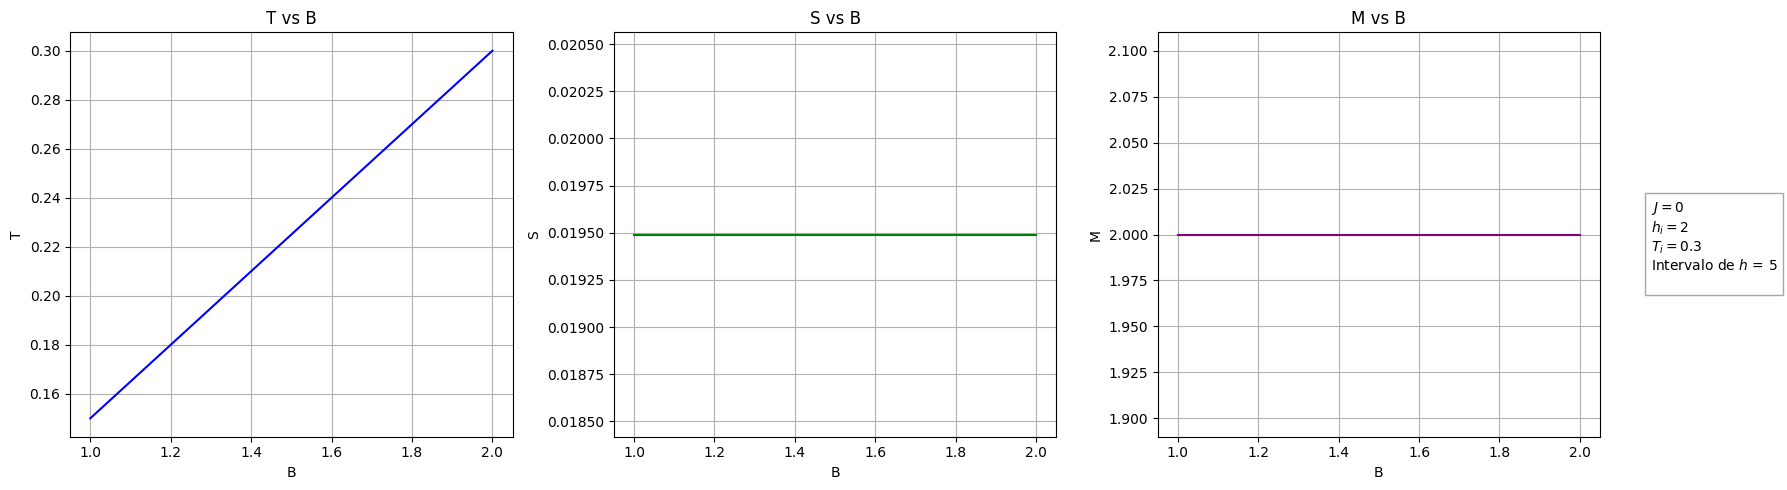

T_values antes do Return de STxBT: [2.   1.75 1.5  1.25 1.  ]
T_valeus[initialOrFinal]: 1.0


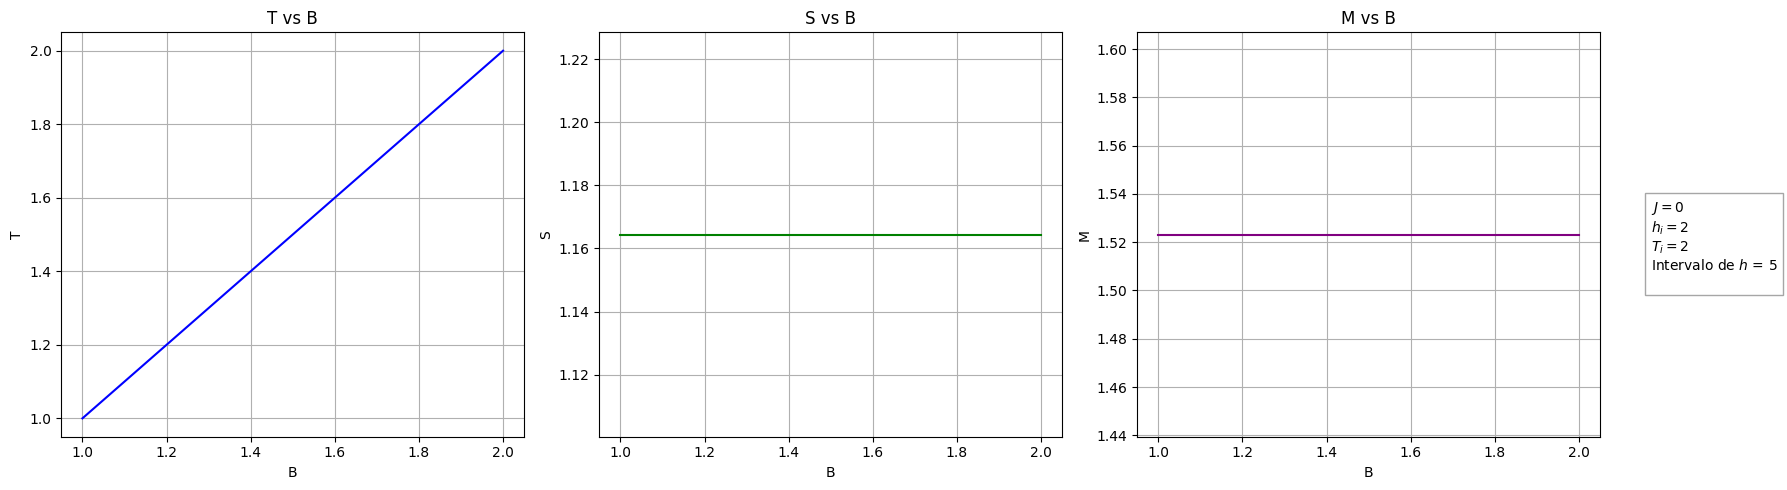

T_values antes do Return de STxBT: [3.    2.625 2.25  1.875 1.5  ]
T_valeus[initialOrFinal]: 1.4999999999999984


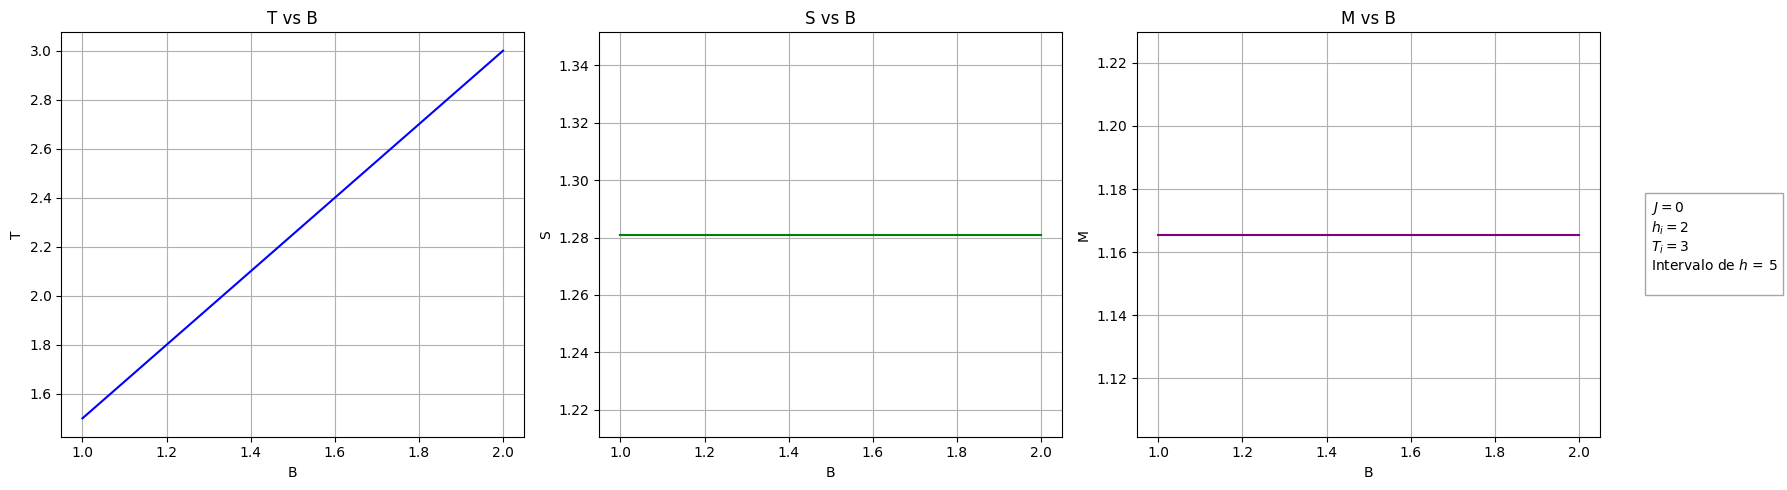

T_values antes do Return de STxBT: [10.    8.75  7.5   6.25  5.  ]
T_valeus[initialOrFinal]: 4.999999999999915


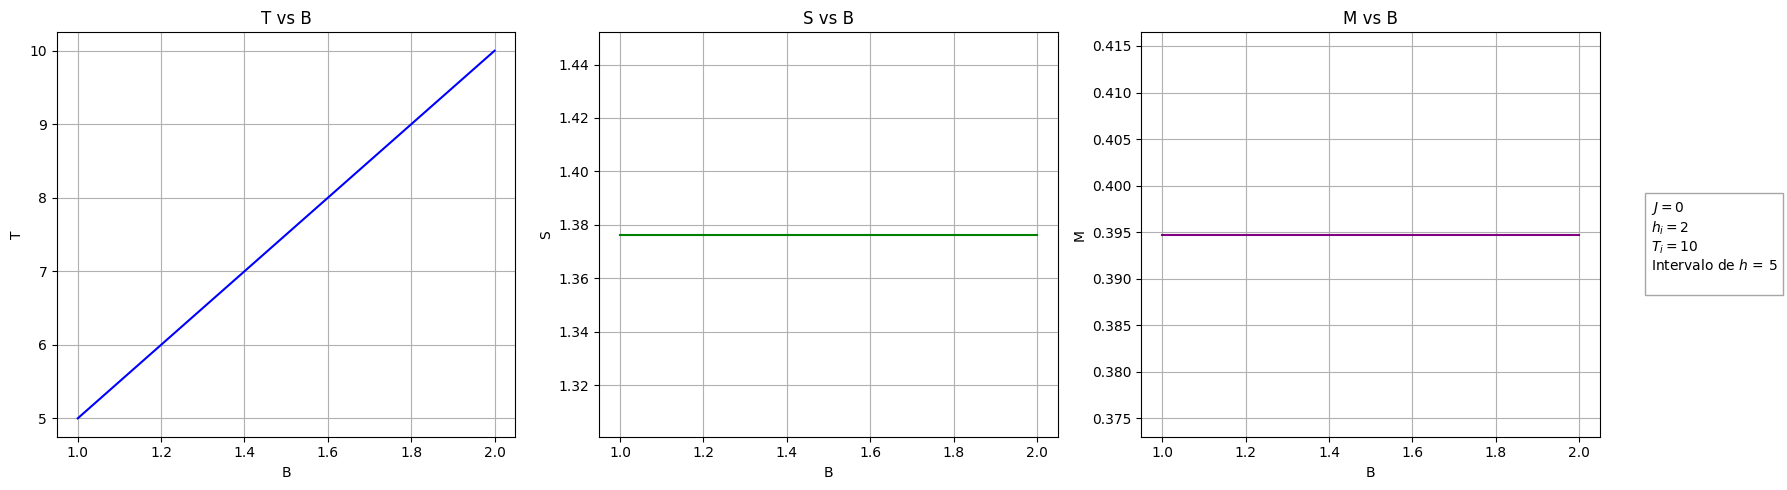

In [12]:
J = 0
hi = 2
hf = 1
T_guess = 0.3
T_guess1 = 2
T_guess3 = 3
T_guess5 = 10
INTERVAL = 5
initialOrFinal = (-1)# [0] para o primeiro item da lista OU [-1] para o último item da lista


[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, INTERVAL, initialOrFinal)
print(f"Calculed_temperature retornado: {calculed_temperatureee}")
plot_BTeBSeBM(J, hi, T_guess, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess1, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess1, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess3, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess3, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess5, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess5, INTERVAL, B_values, T_values, S_values, M_values)

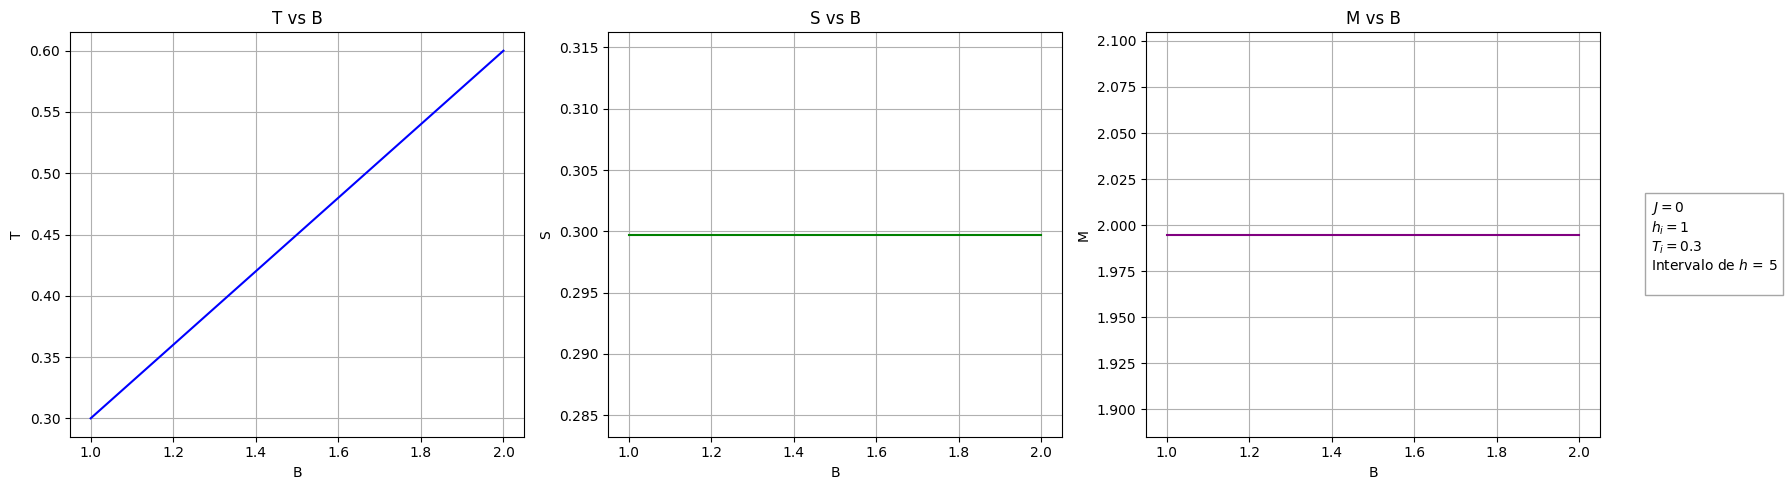

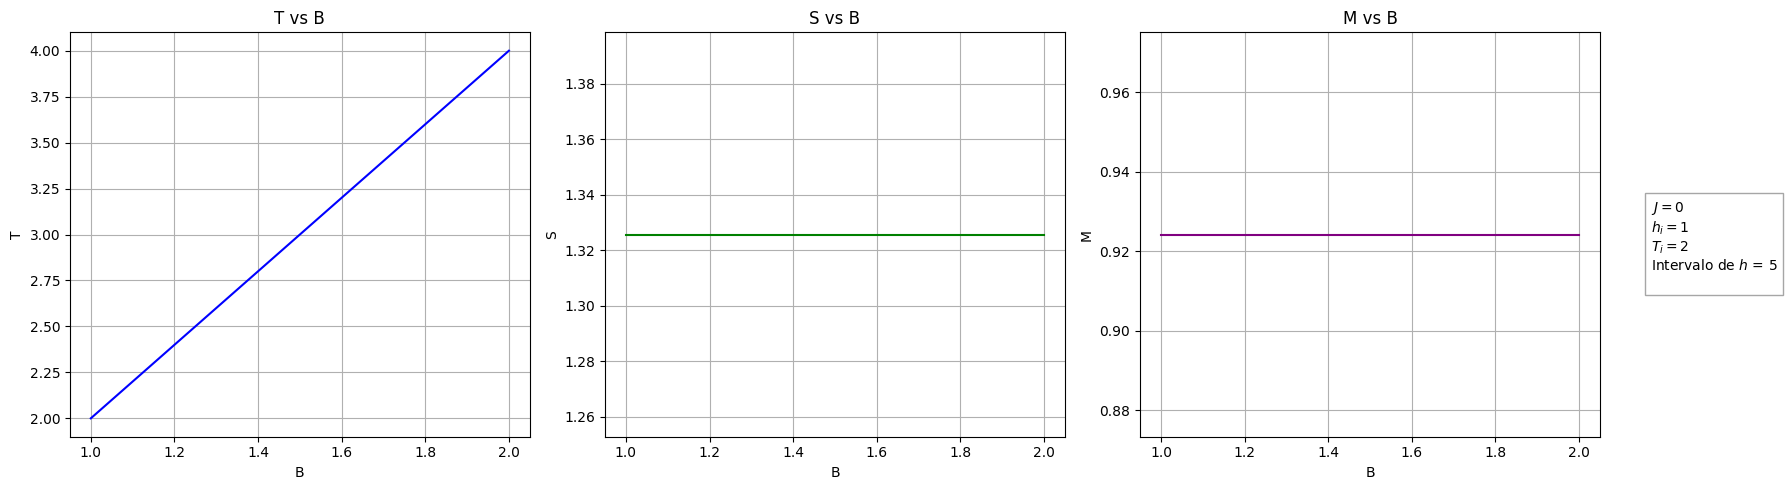

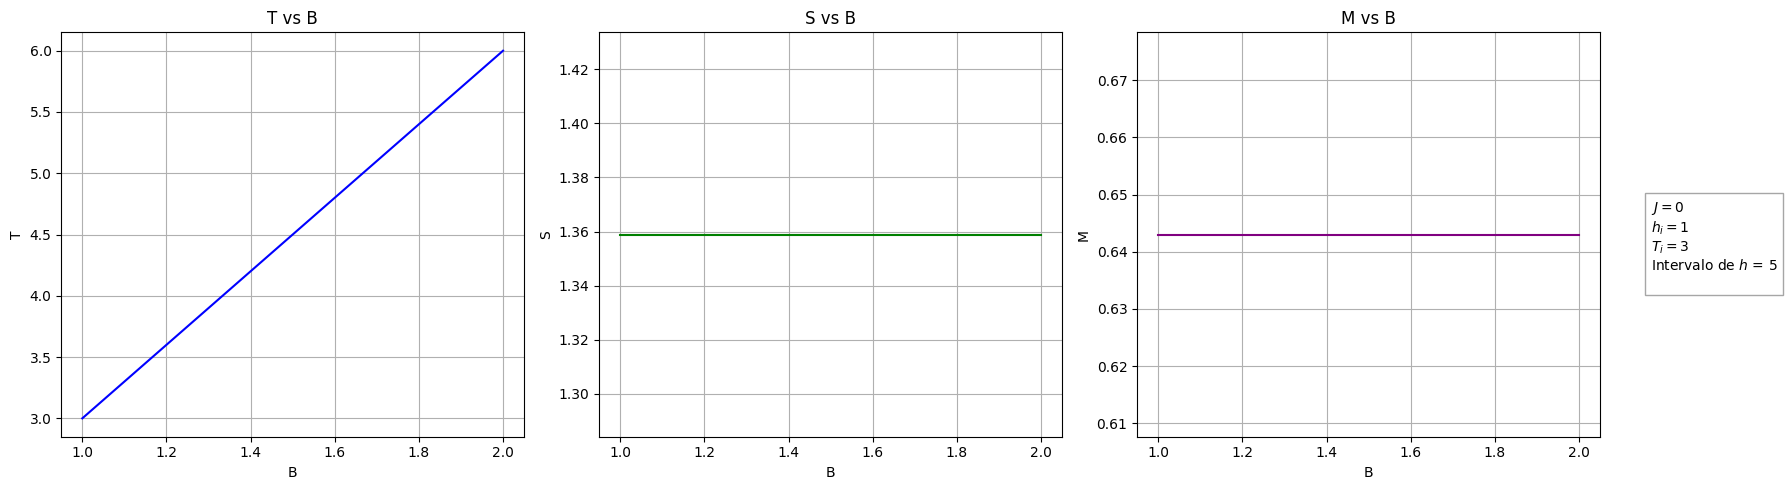

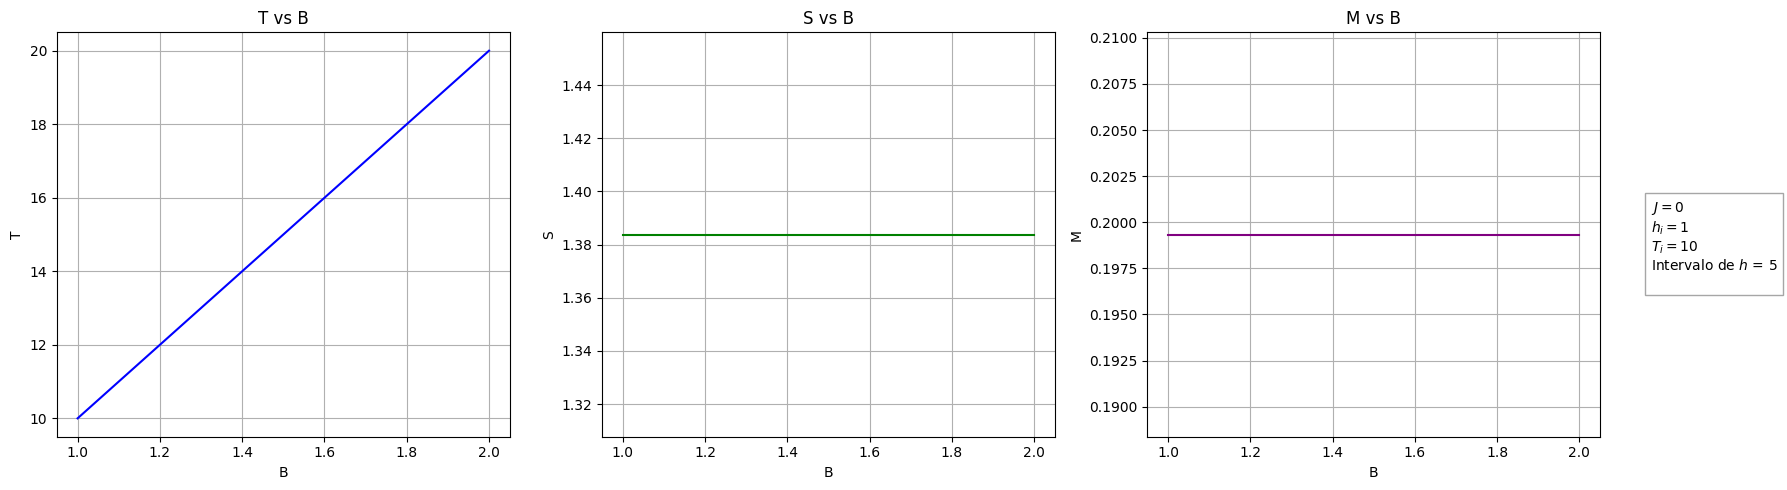

In [132]:
J = 0
hi = 1
hf = 2
T_guess = 0.3
T_guess1 = 2
T_guess3 = 3
T_guess5 = 10
INTERVAL = 5
initialOrFinal = (-1)# [0] para o primeiro item da lista OU [-1] para o último item da lista


[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess1, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess1, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess3, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess3, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess5, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess5, INTERVAL, B_values, T_values, S_values, M_values)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32920\3588124007.py:77: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)


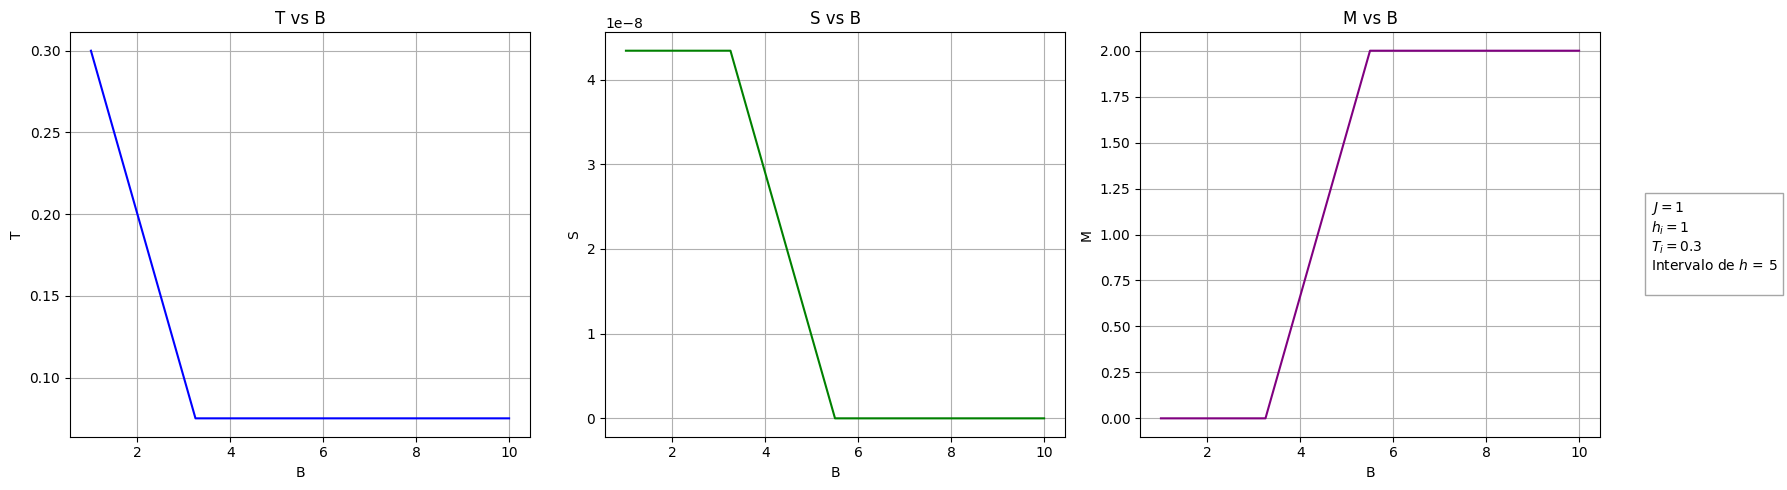

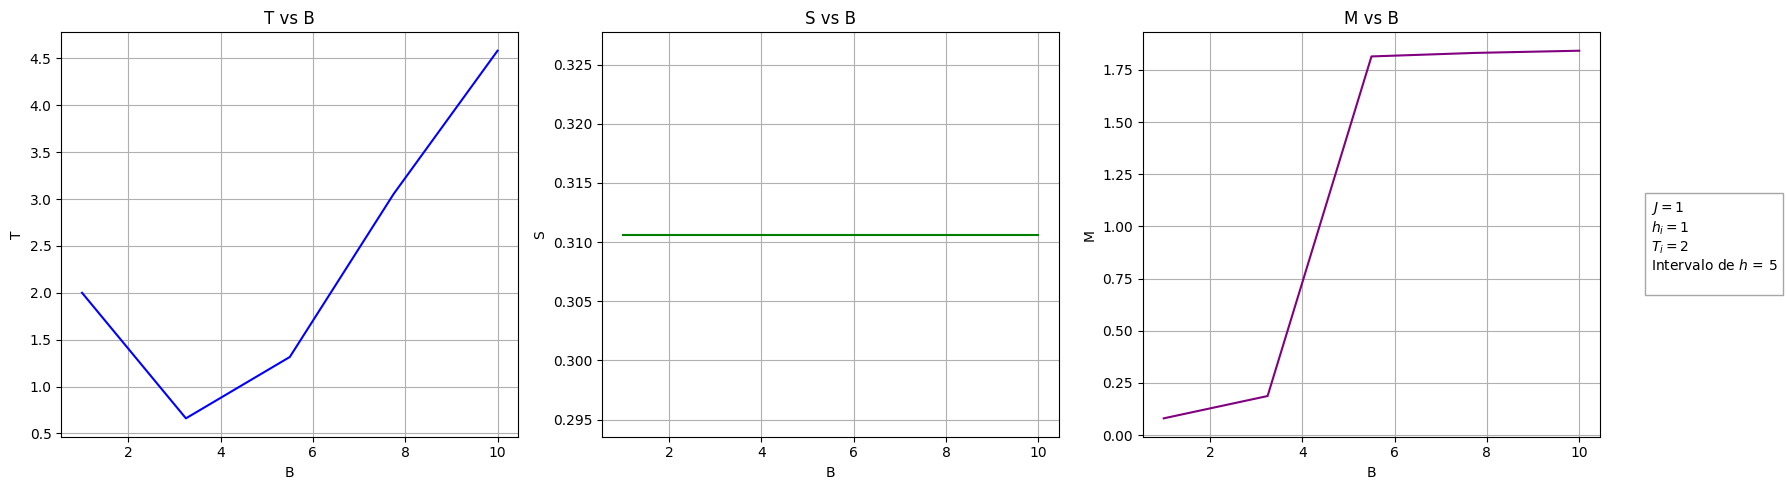

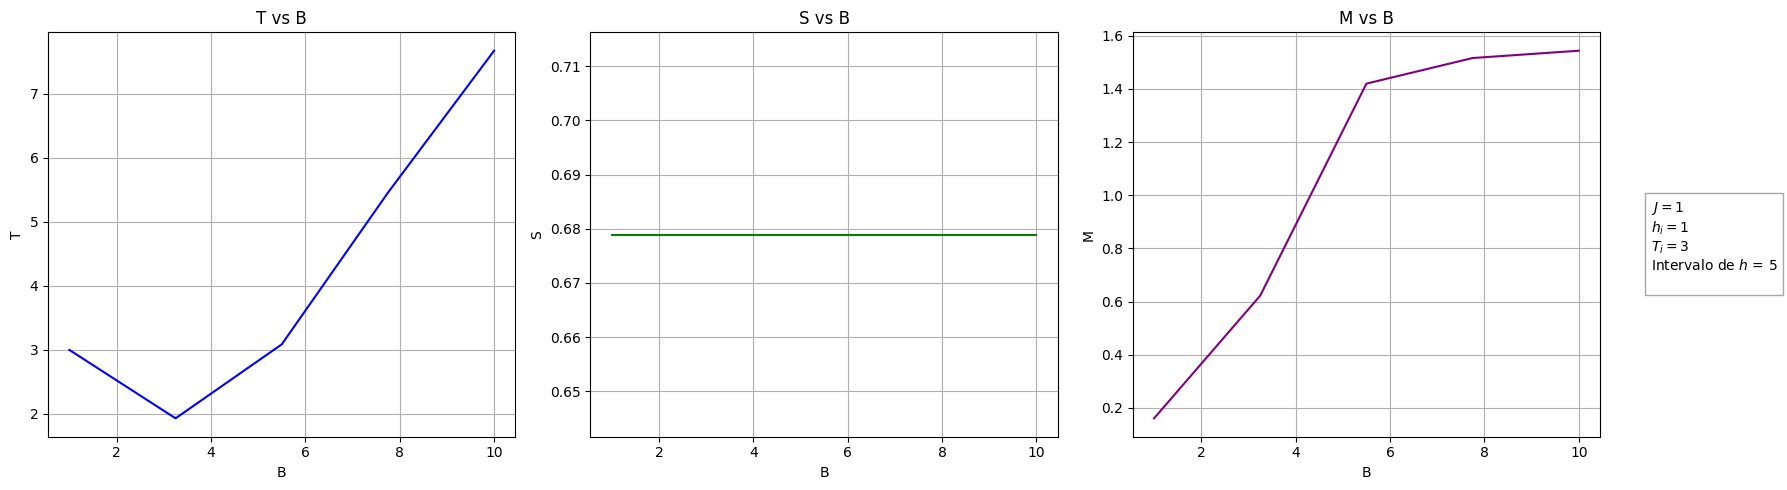

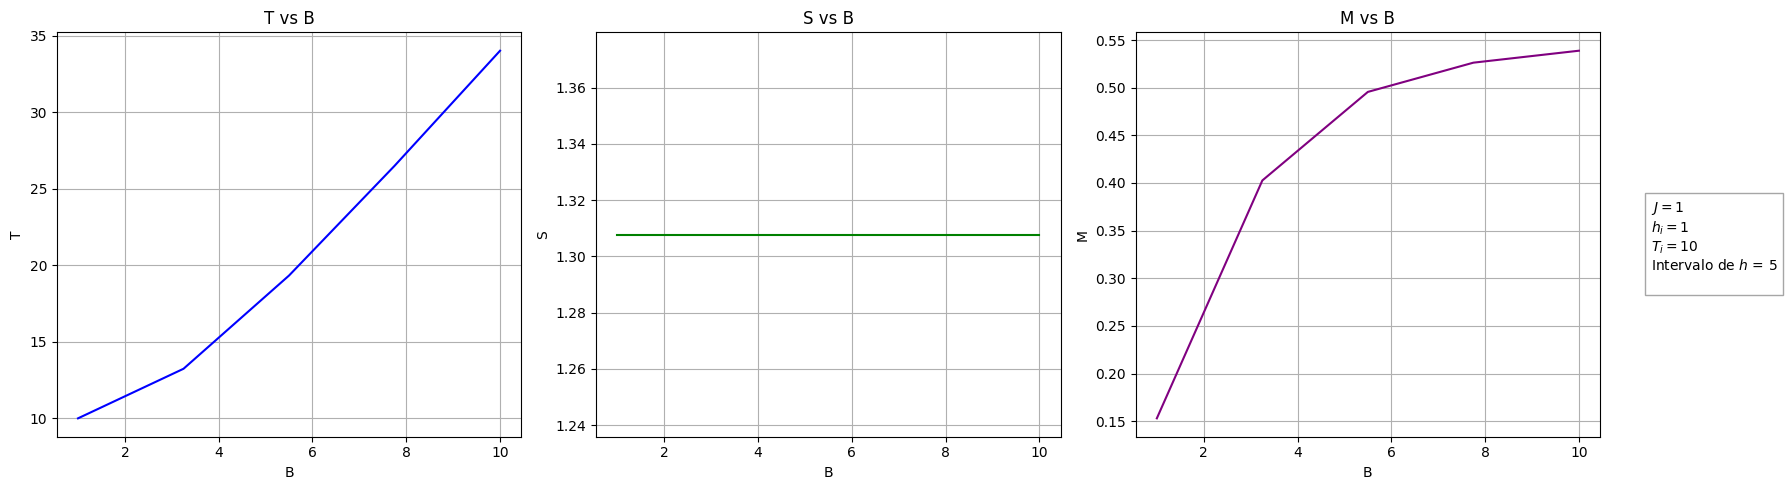

In [8]:
J = 1
hi = 1
hf = 10
T_guess = 0.3
T_guess1 = 2
T_guess3 = 3
T_guess5 = 10
INTERVAL = 5
initialOrFinal = (-1)# [0] para o primeiro item da lista OU [-1] para o último item da lista


[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess1, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess1, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess3, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess3, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess5, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess5, INTERVAL, B_values, T_values, S_values, M_values)



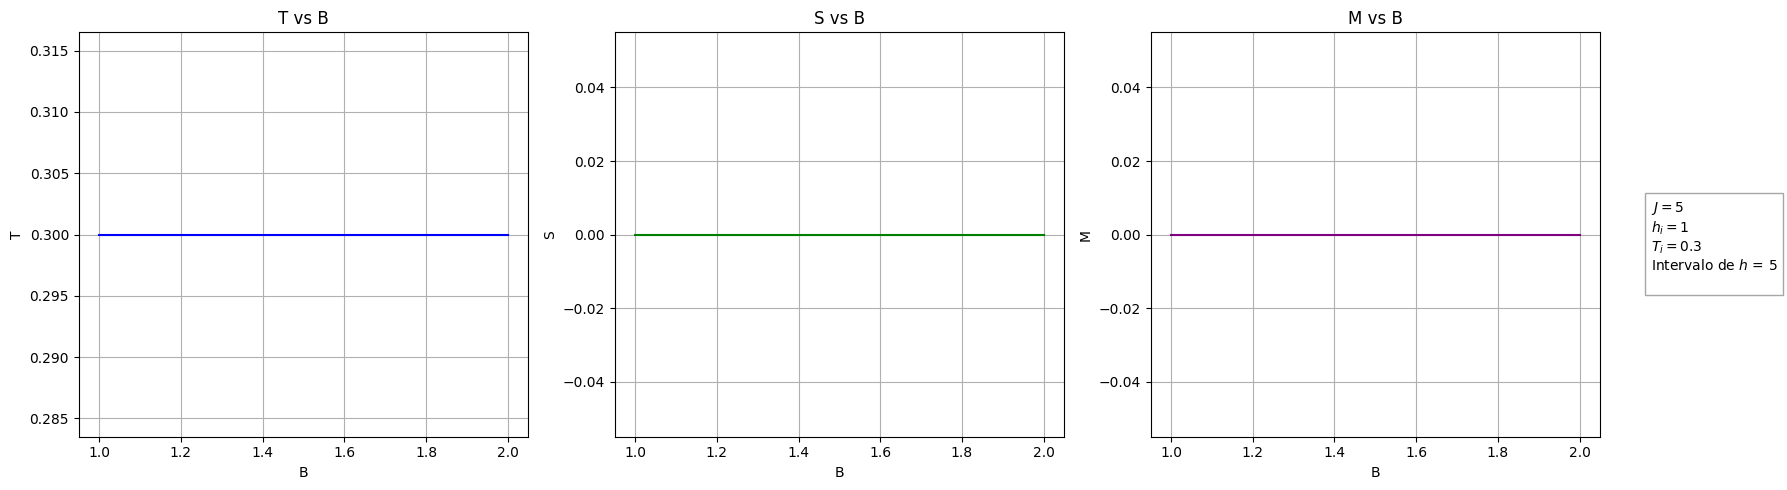

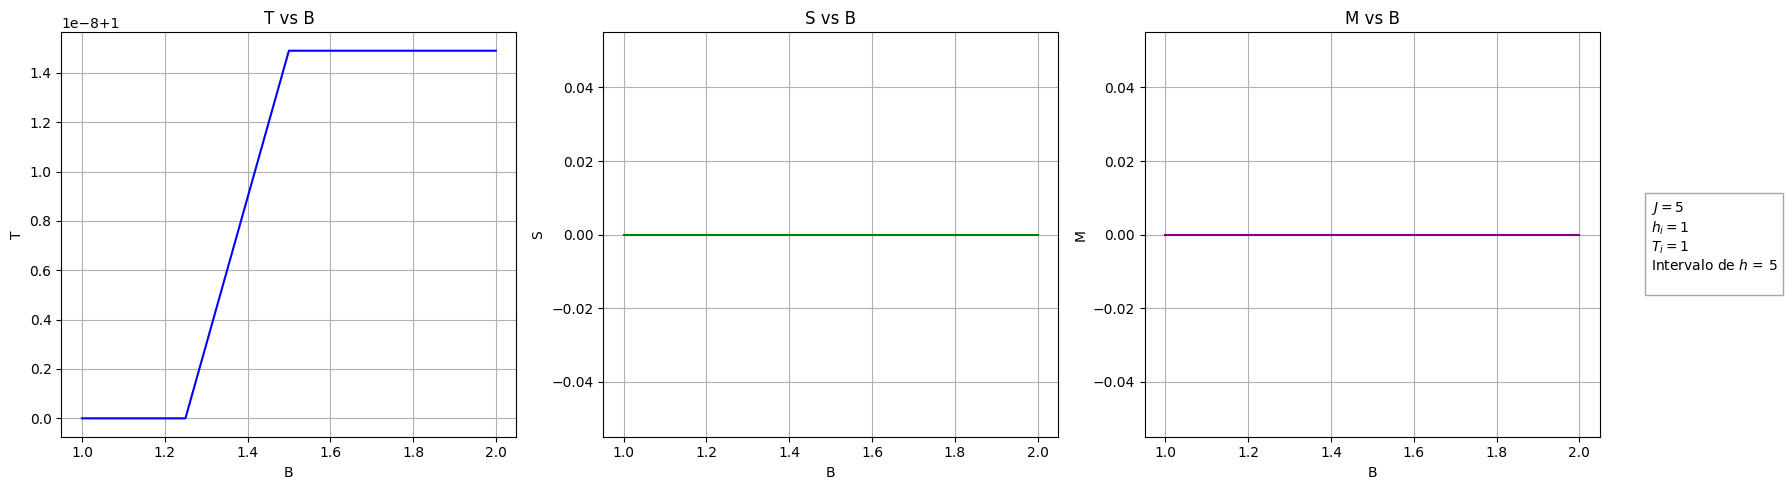

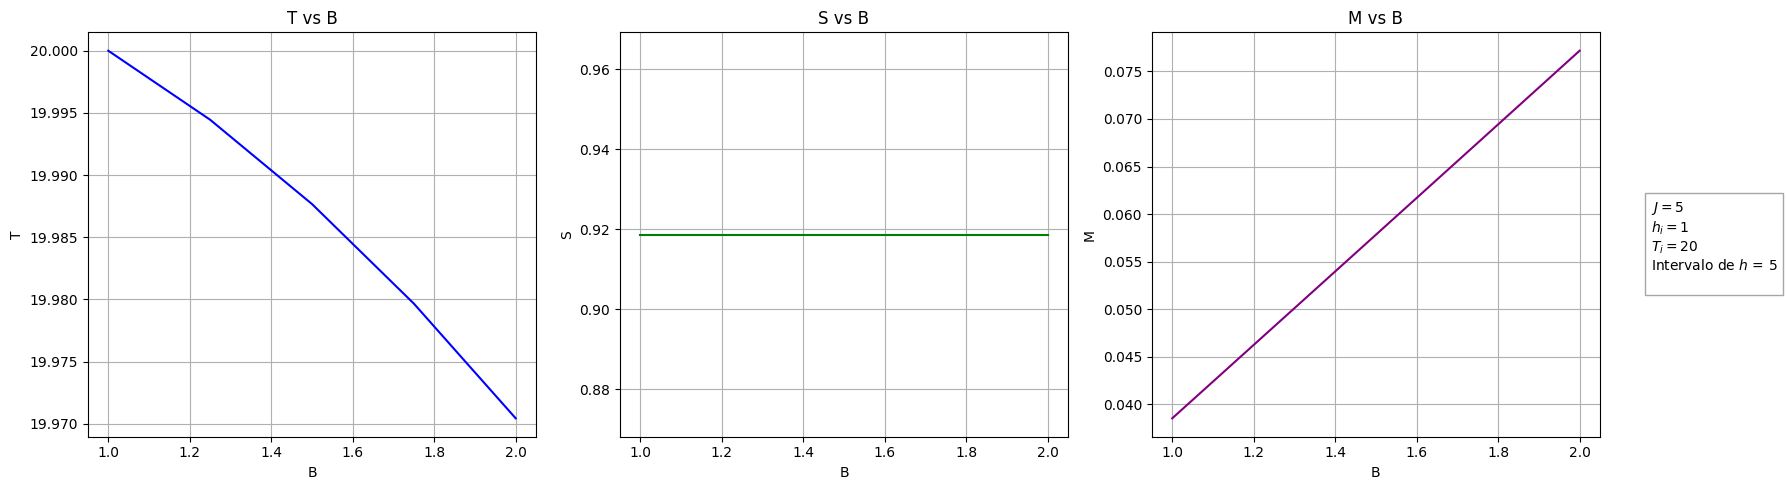

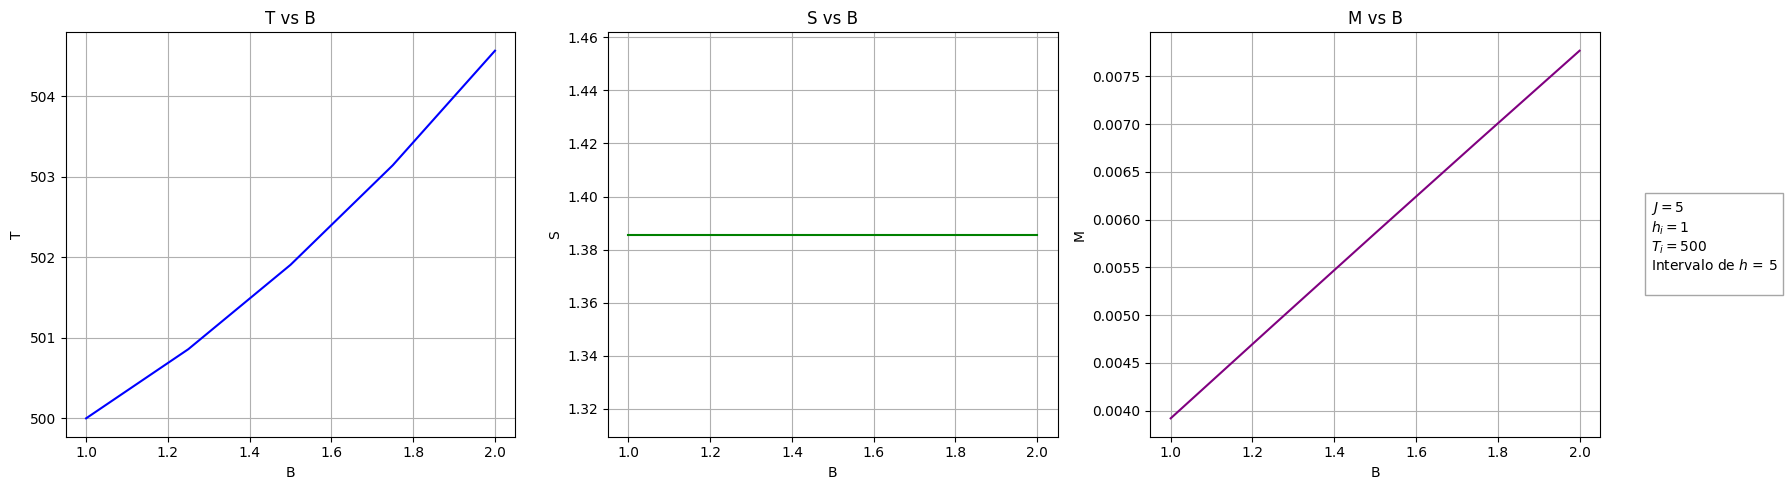

In [9]:
J = 5
hi = 1
hf = 2
T_guess = 0.3
T_guess1 = 1
T_guess3 = 20
T_guess5 = 500
INTERVAL = 5
initialOrFinal = (-1)# [0] para o primeiro item da lista OU [-1] para o último item da lista


[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess1, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess1, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess3, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess3, INTERVAL, B_values, T_values, S_values, M_values)

[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess5, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess5, INTERVAL, B_values, T_values, S_values, M_values)


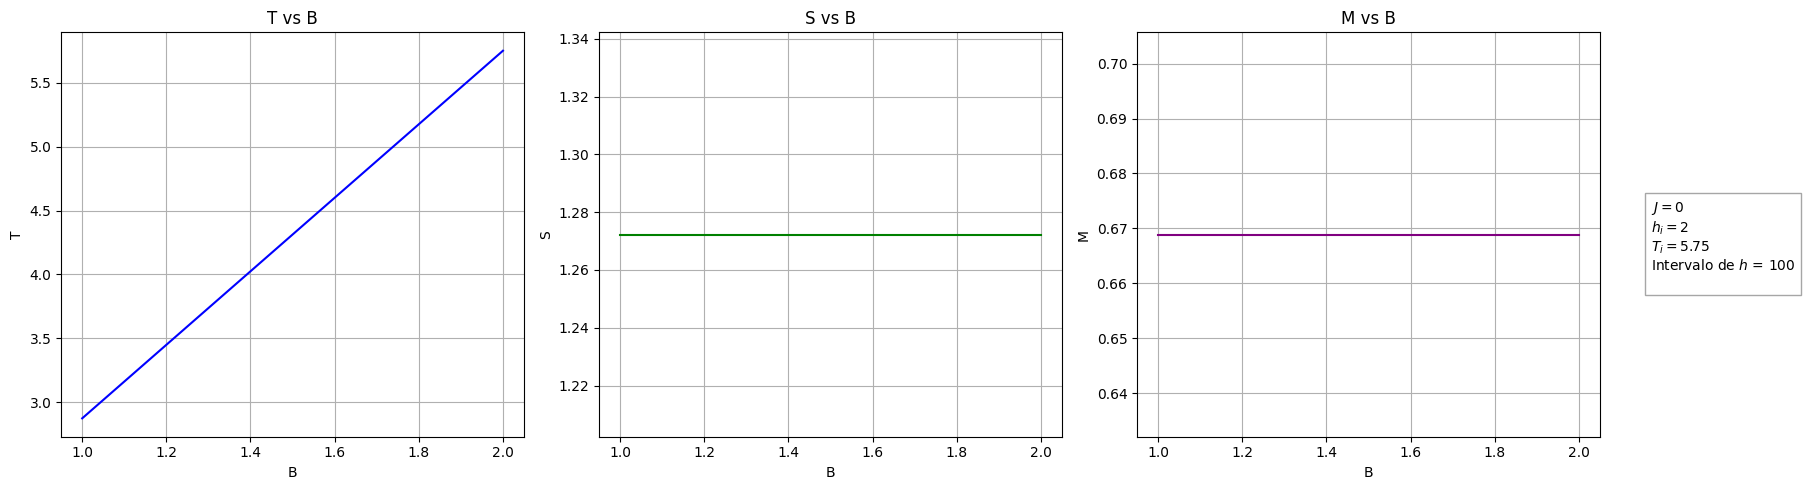

[5.75       5.7209596  5.69191919 5.66287879 5.63383838 5.60479798
 5.57575758 5.54671717 5.51767677 5.48863636 5.45959596 5.43055556
 5.40151515 5.37247475 5.34343434 5.31439394 5.28535354 5.25631313
 5.22727273 5.19823232 5.16919192 5.14015152 5.11111111 5.08207071
 5.0530303  5.0239899  4.99494949 4.96590909 4.93686869 4.90782828
 4.87878788 4.84974747 4.82070707 4.79166667 4.76262626 4.73358586
 4.70454545 4.67550505 4.64646465 4.61742424 4.58838384 4.55934343
 4.53030303 4.50126263 4.47222222 4.44318182 4.41414141 4.38510101
 4.35606061 4.3270202  4.2979798  4.26893939 4.23989899 4.21085859
 4.18181818 4.15277778 4.12373737 4.09469697 4.06565657 4.03661616
 4.00757576 3.97853535 3.94949495 3.92045455 3.89141414 3.86237374
 3.83333333 3.80429293 3.77525253 3.74621212 3.71717172 3.68813131
 3.65909091 3.63005051 3.6010101  3.5719697  3.54292929 3.51388889
 3.48484848 3.45580808 3.42676768 3.39772727 3.36868687 3.33964646
 3.31060606 3.28156566 3.25252525 3.22348485 3.19444444 3.1654

In [10]:
J = 0
hi = 2
hf = 1
T_guess = 5.75
#T_guess1 = 3
#T_guess3 = 5.75
#T_guess5 = 10
INTERVAL = 100
initialOrFinal = (-1)# [0] para o primeiro item da lista OU [-1] para o último item da lista


[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, INTERVAL, initialOrFinal)
plot_BTeBSeBM(J, hi, T_guess, INTERVAL, B_values, T_values, S_values, M_values)
print(T_values)

#[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess1, INTERVAL, initialOrFinal)
#plot_BTeBSeBM(J, hi, T_guess1, INTERVAL, B_values, T_values, S_values, M_values)

#[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess3, INTERVAL, initialOrFinal)
#plot_BTeBSeBM(J, hi, T_guess3, INTERVAL, B_values, T_values, S_values, M_values)

#[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess5, INTERVAL, initialOrFinal)
#plot_BTeBSeBM(J, hi, T_guess5, INTERVAL, B_values, T_values, S_values, M_values)


Temperatura no processo adiabático:

Campo magnético:

O calor e o trabalho vai ser calculado através da variação da energia interna em cada processo, i.e., $W= \Delta U$ ou $\Delta Q = U$ em cada um dos processo. De forma mais clara:

 - $W_{out} = U_{B} - U_{A}$  ||
  $(T_c, \lambda_i) \rightarrow (T_{c}^*, \lambda_f)$;

 - $Q_{h} = U_{C} - U_{B}$    ||
  $(T_{c}^*, \lambda_f) \rightarrow (T_h, \lambda_f)$;

 - $W_{in} = U_{D} - U_{C}$   ||
  $(T_h, \lambda_f) \rightarrow (T_{c}^*, \lambda_i)$;

 - $Q_{c} = U_{D} - U_{A}$    ||
  $(T_{c}^*, \lambda_i) \rightarrow (T_c, \lambda_i)$.  


NOTA: As temperaturas $T_c^*$ e $T_h^*$ são as temperaturas obtidas através da solução da equação $f(J,h,T,S) = 0$, para $S$ constante. A priori, $T_c$ e $T_h$ são fixas, pois são macroscópicas. 

$W_{out}:$

In [10]:
def out_Work(J, hi, hf, Tc, INTERVAL, initialOrFinal):
    
    
    
    Ua = internal_Energy(J, hi, Tc)
    
    add_Th = calc_BTandBS(J, hi, hf, Tc, INTERVAL, initialOrFinal)[0]
    Ub = internal_Energy(J, hf, add_Th)
    
    work_out = Ub - Ua
    
        
    return [work_out, add_Th]

$W_{in}:$

In [11]:
def in_Work(J, hi, hf, Th, INTERVAL, initialOrFinal):
    
    Uc = internal_Energy(J, hf, Th)
        
    add_Tc = calc_BTandBS(J, hf, hi, Th, INTERVAL, initialOrFinal)[0]        
    Ud = internal_Energy(J, hi, add_Tc)
    
    work_in = Ud - Uc
    
    
    return [work_in, add_Tc]

$Q_h:$

In [12]:
def hot_Q(J, hf, Th, add_Tc):
    
    Uc = internal_Energy(J, hf, Th)
    Ub = internal_Energy(J, hf, add_Tc)    
    
    Q_hot = Uc - Ub
    
    return Q_hot

$Q_c:$

In [13]:
def cold_Q(J, hi, Tc, add_Th):
    
    
    Ua = internal_Energy(J, hi, Tc) 
    Ud = internal_Energy(J, hi, add_Th)
    
    Q_cold = Ud - Ua
    
    return Q_cold

In [13]:
def ciclo_Otto(J, hi, hf, Tc, Th, INTERVAL, initialOrFinal):
    
    Ua = internal_Energy(J, hi, Tc)
    
    add_Tc = calc_BTandBS(J, hi, hf, Tc, INTERVAL, initialOrFinal)[0]
    Ub = internal_Energy(J, hf, add_Tc)
    
    Uc = internal_Energy(J, hf, Th)
    
    add_Th = calc_BTandBS(J, hf, hi, Th, INTERVAL, initialOrFinal)[0]        
    Ud = internal_Energy(J, hi, add_Th)
    
    work_out = Ub - Ua
    work_in = Ud - Uc
    Q_hot = Uc - Ub
    Q_cold = Ud - Ua
    
    
    return work_out, work_in, Q_hot, Q_cold, add_Tc, add_Th

In [14]:
J = 0
hi = 1
hf = 2
Tc = 1
Th = 5.75
INTERVAL = 10
initialOrFinal = (-1)


Wout, Win, Qhot, Qcold, add_Tc, add_Th = ciclo_Otto(J, hi, hf, Tc, Th, INTERVAL, initialOrFinal)

#[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, T_guess, ENTROPY, INTERVAL, initialOrFinal)

#[Wout, add_Tc] = out_Work(J, hi, hf, Tc, INTERVAL, initialOrFinal)
#print(f"Valor add_Tc: {add_Tc}")
#[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hi, hf, Tc, INTERVAL, initialOrFinal)

#plot_BTeBSeBM(J, hi, Tc, B_values, T_values, S_values, M_values)

#print("===============================")

###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
#[Win, add_Th] = in_Work(J, hi, hf, Th, INTERVAL, initialOrFinal)
#print(f"Valor add_Th: {add_Th}")
#[calculed_temperatureee, B_values, T_values, S_values, M_values] = calc_BTandBS(J, hf, hi, Th, INTERVAL, initialOrFinal)
#plot_BTeBSeBM(J, hf, Th, B_values, T_values, S_values, M_values)
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win
###### LEMBRAR DE TROCAR A ORDEM DOS CAMPOS DO Win




#Qhot = hot_Q(J, hf, Th, add_Tc)
#Qcold = cold_Q(J, hi, Tc, add_Th)


print(f"Tc: {Tc}")
print(f"add_Th(Win):{add_Th}")

print(f"Th: {Th}")
print(f"add_Tc(Wout):{add_Tc}")


eta = (abs(Wout) - abs(Win))/Qhot

print(f"Rendimento: {eta}, Win: {Win}, Wout: {Wout}, Qhot: {Qhot}, Qcold: {Qcold}")

T_values antes do Return de STxBT: [1.         1.11111111 1.22222222 1.33333333 1.44444444 1.55555556
 1.66666667 1.77777778 1.88888889 2.        ]
T_valeus[initialOrFinal]: 1.9999999999999973
T_values antes do Return de STxBT: [5.75       5.43055556 5.11111111 4.79166667 4.47222222 4.15277778
 3.83333333 3.51388889 3.19444444 2.875     ]
T_valeus[initialOrFinal]: 2.8749999999999942
Tc: 1
add_Th(Win):2.8749999999999942
Th: 5.75
add_Tc(Wout):1.9999999999999973
Rendimento: 0.5430575226593969, Win: 0.1721806231819542, Wout: -0.46211715726001057, Qhot: 0.5338965431474249, Qcold: 0.2439600090693685


Fazendo o gráfico $T_{a}$ X $T_{b}$. A intenção é determinar qual é o melhor range de temperaturas para a máquina operar para determinado $J$, $B_i$ e $B_f$.

In [15]:
def Calculo():
    Ta = Ta_grid[i, j]
    Tb = Tb_grid[i, j]

    
    print("CALCULANDO w_out:")
    out_W, add_Tc = out_Work(J, hi, hf, T_a[i], ENTROPY, INTERVAL, initialOrFinal)
    
    print("CALCULANDO W_IN:")
    in_W, add_Th = in_Work(J, hi, hf, T_b[j], ENTROPY, INTERVAL, initialOrFinal)

    Qcc = cold_Q(J, hf, T_a[i], add_Th)
    Qhh = hot_Q(J, hi, T_b[j], add_Tc)
    

    W[i, j] = out_W + in_W
    Qh[i, j] = Qhh
    Qc[i, j] = Qcc
    ETA[i, j] = ((out_W + in_W)/Qhh)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f):
    # 3. Criar uma grade para Ta e Tb
    T_a = np.linspace(Ta_i, Ta_f, IINTERVAL)
    T_b = np.linspace(Tb_i, Tb_f, IINTERVAL)
    Ta_grid, Tb_grid = np.meshgrid(T_a, T_b)
    
    # Inicializar matrizes para W, Qh, Qc
    W = np.zeros_like(Ta_grid)
    Qh = np.zeros_like(Ta_grid)
    Qc = np.zeros_like(Ta_grid)
    ETA = np.zeros_like(Ta_grid)
    
    
    
    # 4. Calcular os valores de W_ciclo, Q_hot e Q_cold para cada ponto
    for i in range(Ta_grid.shape[0]):
        for j in range(Ta_grid.shape[1]):
            
            Ta = Ta_grid[i, j]
            Tb = Tb_grid[i, j]
            
            
            Wout, Win, Qhot, Qcold, add_Tc, add_Th = ciclo_Otto(J, hi, hf, Ta, Tb, INTERVAL, initialOrFinal)
            #print("CALCULANDO w_out:")
            
            #out_W, add_Tc = out_Work(J, hi, hf, T_a[i], INTERVAL, initialOrFinal)
            #print("CALCULANDO W_IN:")
            
            #in_W, add_Th = in_Work(J, hi, hf, T_b[j], INTERVAL, initialOrFinal)           
            #Qhh = hot_Q(J, hi, T_b[j], add_Tc)
            #Qcc = cold_Q(J, hf, T_a[i], add_Th)            
            

            W[i, j] = (Wout + Win)
            Qh[i, j] = Qhot
            Qc[i, j] = Qcold
            
            if Qhot != 0 and not np.isnan(Qhot) and not np.isinf(Qhot):
                ETA[i, j] = ((-1)*(Wout + Win) / Qhot)
            else:
                ETA[i, j] = np.nan  # ou algum valor padrão
            #ETA[i, j] = (((-1)*((Wout) + (Win)))/ Qhot )

    

    # 5. Identificar as regiões
    regions = np.zeros_like(W, dtype=float)
    tipo = type(W)
    print(f"tipo de W: {W}")
    
    # Máquina
    engine = ((W < 0))
    regions[engine] = 0


    # Refrigerador
    refrigerador = (((W > 0) & (Qh > 0) & (Qc < 0) & (Ta_grid < Tb_grid)) | ((W > 0) & (Qh < 0) & (Qc > 0) & (Ta_grid > Tb_grid)))
    regions[refrigerador] = 2

    # Acelerador
    acelerador = (((W > 0) & (Qc < 0) & (Ta_grid < Tb_grid)) | ((W > 0) & (Qh > 0) & (Ta_grid > Tb_grid)))
    regions[acelerador] = 1

    # Aquecedor
    regions[(W > 0) & (Qh < 0) & (Qc < 0)] = 3

    # 6. Plotar as regiões
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores
    contour = plt.contourf(T_b, T_a, regions, levels=np.arange(5), cmap=cmap)
    
    
    
    
    ## Intervalos desejados
    #intervalos_eta = [(i, i + 0.1) for i in np.arange(0.1, 0.9, 0.01)]
    
    # Dicionário para guardar os valores médios por intervalo
    #medias_por_intervalo = {}
    
    # Percorrer cada intervalo e calcular a média dos valores dentro dele
    #for (a, b) in intervalos_eta:
    #    valores_no_intervalo = ETA[(ETA >= a) & (ETA < b)]
    #    
    #    if valores_no_intervalo.size > 0:
    #        media = valores_no_intervalo.mean()
    #    else:
    #        media = np.nan  # Caso não haja valores no intervalo
    #    
    #    medias_por_intervalo[f"{a:.1f}–{b:.1f}"] = media




    # Adicionar barra de cores e legenda
    
    cbar = plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5])
    cbar.ax.set_yticklabels(['Máquina', 'Acelerador', 'Refrigerador', 'Aquecedor'])

    # Adicionar os parâmetros no gráfico
    param_text = (
        f"$J = {J}$\n"
        f"$h_i = {hi}$\n"
        f"$h_f = {hf}$\n"
        f"hi and hf interval = {INTERVAL}\n"        
        f"Ta e Tb interval = {IINTERVAL}"
    )
    plt.text(1, 9, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Regiões de Operação")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()
    
    # Plotar gráfico de eficiência ETA em função de Ta e Tb
    plt.figure(figsize=(10, 8))
    eta_plot = plt.contourf(T_b, T_a, ETA, levels=200, cmap='viridis')
    cbar_eta = plt.colorbar(eta_plot)
    cbar_eta.set_label("Eficiência (η)", fontsize=12)

    plt.title("Eficiência η em função de Ta e Tb")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f):
    # 3. Criar uma grade para Ta e Tb
    T_a = np.linspace(Ta_i, Ta_f, IINTERVAL)
    T_b = np.linspace(Tb_i, Tb_f, IINTERVAL)
    Ta_grid, Tb_grid = np.meshgrid(T_a, T_b)
    
    # Inicializar matrizes para W, Qh, Qc
    W = np.zeros_like(Ta_grid)
    Qh = np.zeros_like(Ta_grid)
    Qc = np.zeros_like(Ta_grid)
    ETA = np.zeros_like(Ta_grid)
    
    # 5. Identificar as regiões
    regions = np.zeros_like(W, dtype=float)
    
    
    # 4. Calcular os valores de W_ciclo, Q_hot e Q_cold para cada ponto
    for i in range(Ta_grid.shape[0]):
        for j in range(Ta_grid.shape[1]):
            
            Ta = Ta_grid[i, j]
            Tb = Tb_grid[i, j]
            
            
            Wout, Win, Qhot, Qcold, add_Tc, add_Th = ciclo_Otto(J, hi, hf, Ta, Tb, INTERVAL, initialOrFinal)
            #print("CALCULANDO w_out:")
            
            #out_W, add_Tc = out_Work(J, hi, hf, T_a[i], INTERVAL, initialOrFinal)
            #print("CALCULANDO W_IN:")
            
            #in_W, add_Th = in_Work(J, hi, hf, T_b[j], INTERVAL, initialOrFinal)           
            #Qhh = hot_Q(J, hi, T_b[j], add_Tc)
            #Qcc = cold_Q(J, hf, T_a[i], add_Th)            
            
            print(f"Win: {Win} | Wout: {Wout}")
            W[i, j] = (Win + Wout)
            Qh[i, j] = Qhot
            Qc[i, j] = Qcold
            
            if Qhot != 0 and not np.isnan(Qhot) and not np.isinf(Qhot):
                ETA[i, j] = ((-1)*(Wout + Win) / Qhot)
            else:
                ETA[i, j] = np.nan  # ou algum valor padrão
            #ETA[i, j] = (((-1)*((Wout) + (Win)))/ Qhot )
            
                # Máquina
            engine = ((W[i,j] < 0))
            regions[engine] = 0


            # Refrigerador
            refrigerador = (((W[i,j] > 0) & (Qh[i,j] > 0) & (Qc[i,j] < 0) & (Ta < Tb)) | ((W[i,j] > 0) & (Qh[i,j] < 0) & (Qc[i,j] > 0) & (Ta > Tb)))
            regions[refrigerador] = 2

            # Acelerador
            acelerador = (((W[i,j] > 0) & (Qc[i,j] < 0) & (Ta < Tb)) | ((W[i,j] > 0) & (Qh[i,j] > 0) & (Ta > Tb)))
            regions[acelerador] = 1

            # Aquecedor
            regions[(W[i,j] > 0) & (Qh[i,j] < 0) & (Qc[i,j] < 0)] = 3

    

    
    
    


    # 6. Plotar as regiões
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores
    contour = plt.contourf(T_b, T_a, regions, levels=np.arange(5), cmap=cmap)
    
    
    
    
    ## Intervalos desejados
    #intervalos_eta = [(i, i + 0.1) for i in np.arange(0.1, 0.9, 0.01)]
    
    # Dicionário para guardar os valores médios por intervalo
    #medias_por_intervalo = {}
    
    # Percorrer cada intervalo e calcular a média dos valores dentro dele
    #for (a, b) in intervalos_eta:
    #    valores_no_intervalo = ETA[(ETA >= a) & (ETA < b)]
    #    
    #    if valores_no_intervalo.size > 0:
    #        media = valores_no_intervalo.mean()
    #    else:
    #        media = np.nan  # Caso não haja valores no intervalo
    #    
    #    medias_por_intervalo[f"{a:.1f}–{b:.1f}"] = media




    # Adicionar barra de cores e legenda
    
    cbar = plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5])
    cbar.ax.set_yticklabels(['Máquina', 'Acelerador', 'Refrigerador', 'Aquecedor'])

    # Adicionar os parâmetros no gráfico
    param_text = (
        f"$J = {J}$\n"
        f"$h_i = {hi}$\n"
        f"$h_f = {hf}$\n"
        f"hi and hf interval = {INTERVAL}\n"        
        f"Ta e Tb interval = {IINTERVAL}"
    )
    plt.text(1, 9, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Regiões de Operação")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()
    
    # Plotar gráfico de eficiência ETA em função de Ta e Tb
    plt.figure(figsize=(10, 8))
    eta_plot = plt.contourf(T_b, T_a, ETA, levels=200, cmap='viridis')
    cbar_eta = plt.colorbar(eta_plot)
    cbar_eta.set_label("Eficiência (η)", fontsize=12)

    plt.title("Eficiência η em função de Ta e Tb")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()

T_values antes do Return de STxBT: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
T_valeus[initialOrFinal]: 0.010000000447034842
T_values antes do Return de STxBT: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
T_valeus[initialOrFinal]: 0.01000000000007611
T_values antes do Return de STxBT: [0.21191919 0.25140029 0.28980275 0.32748502 0.3646625  0.40147215
 0.43800523 0.47432494 0.51047648 0.54649304]
T_valeus[initialOrFinal]: 0.5464930428141389
T_values antes do Return de STxBT: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
T_valeus[initialOrFinal]: 0.01000000000007611
T_values antes do Return de STxBT: [0.41383838 0.47419781 0.53418868 0.59391116 0.65343313 0.71280168
 0.77205036 0.83120367 0.89027988 0.94929287]
T_valeus[initialOrFinal]: 0.9492928658670533
T_values antes do Return de STxBT: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
T_valeus[initialOrFinal]: 0.01000000000007611
T_values antes do Return de STxBT: [0.61575758 0.69431778 0.77335373 0.85267025 0

C:\Users\bolar\AppData\Local\Temp\ipykernel_10580\3917925778.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


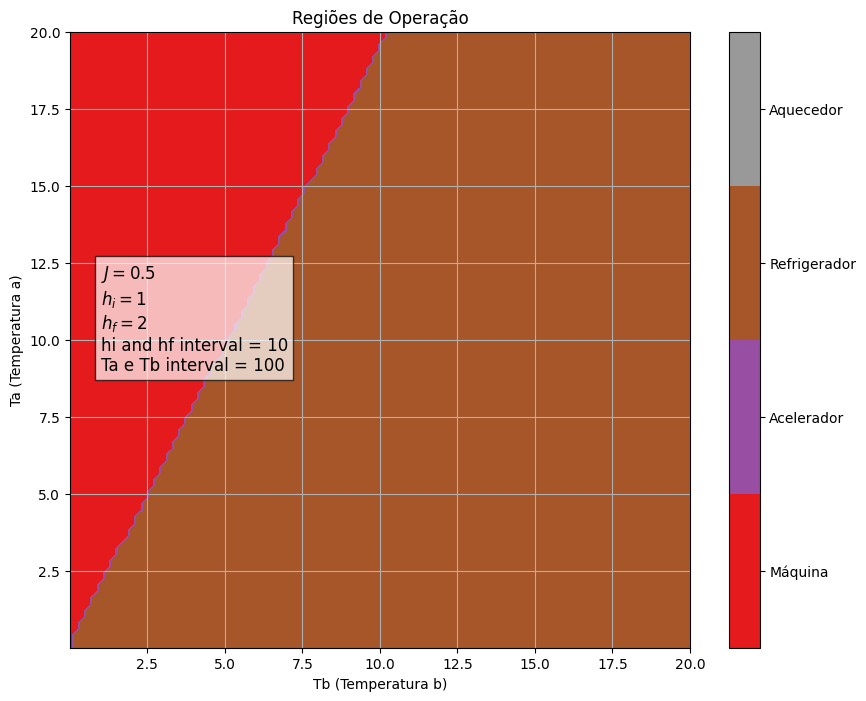

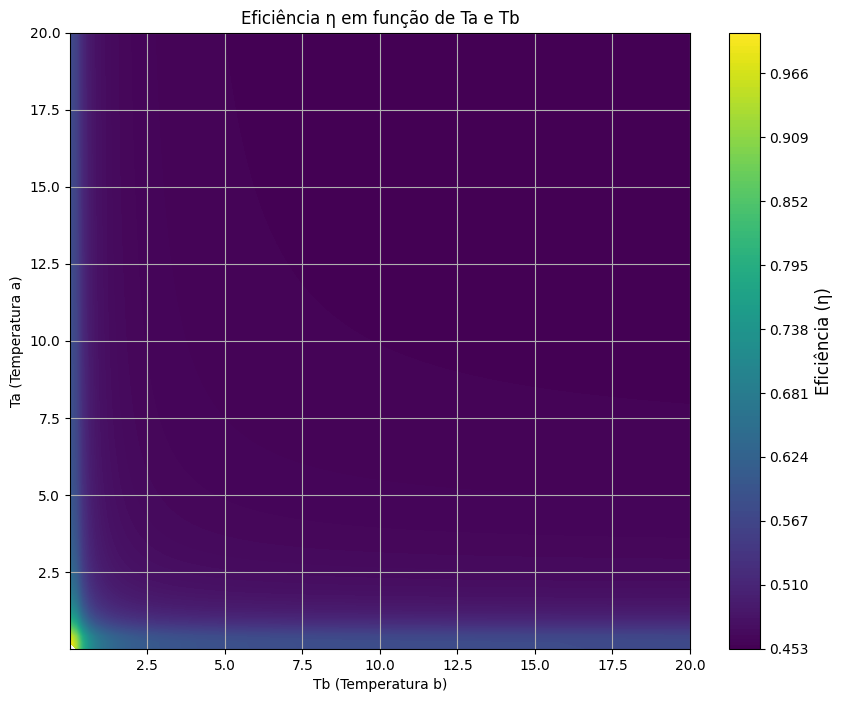

In [17]:
J = 0.5
hi = 1
hf = 2
INTERVAL = 10
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_21468\2712702382.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


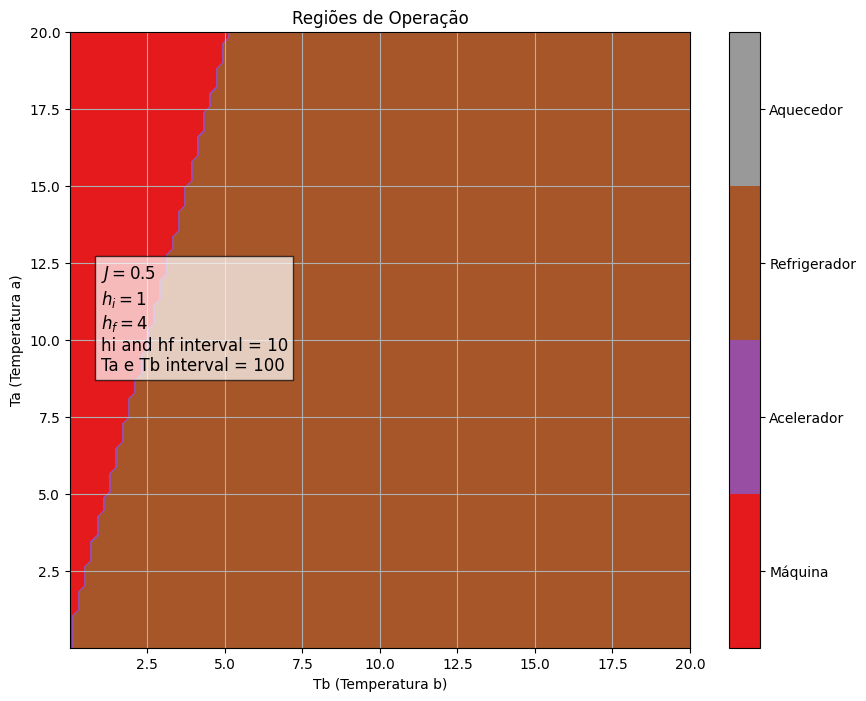

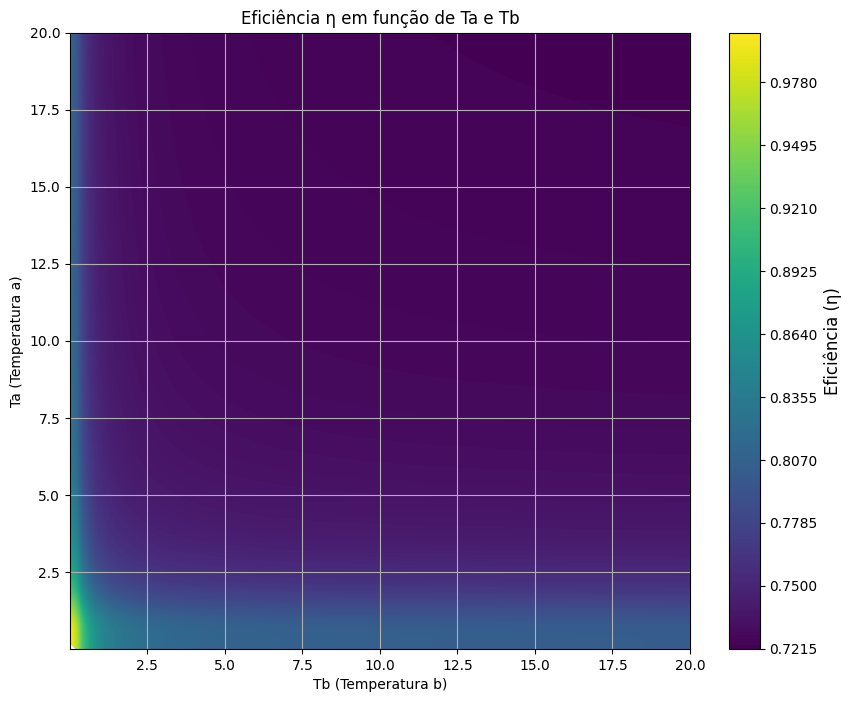

In [90]:
J = 0.5
hi = 1
hf = 4
INTERVAL = 10
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_21468\2609251724.py:76: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)
C:\Users\bolar\AppData\Local\Temp\ipykernel_21468\2712702382.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


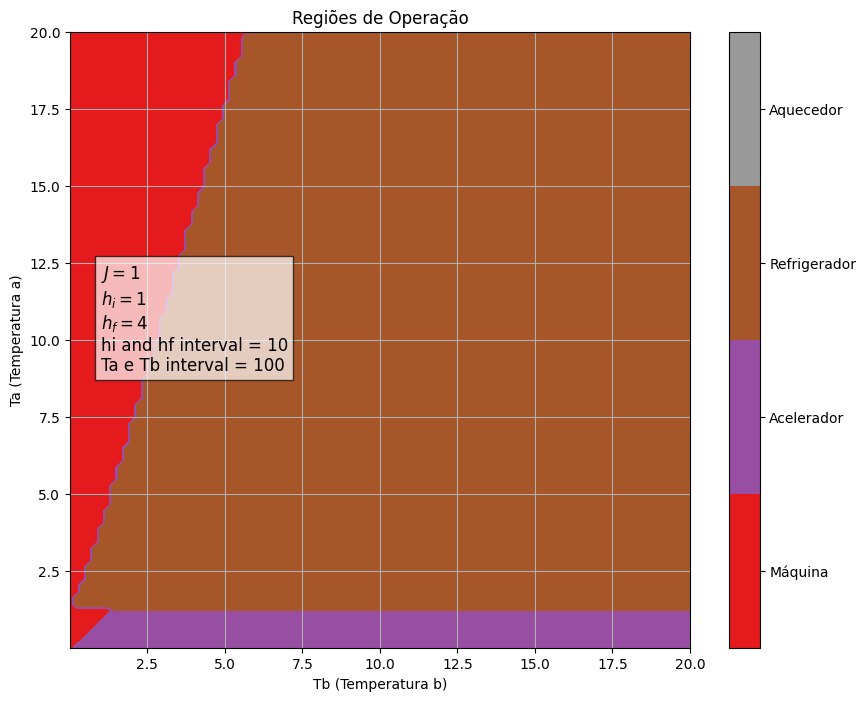

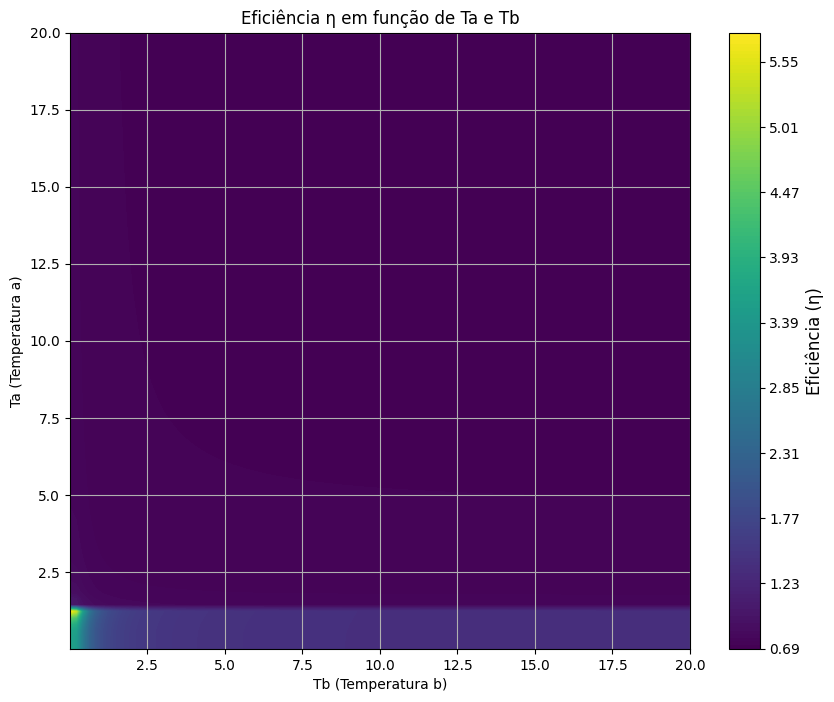

In [91]:
J = 1
hi = 1
hf = 4
INTERVAL = 10
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_21468\2712702382.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


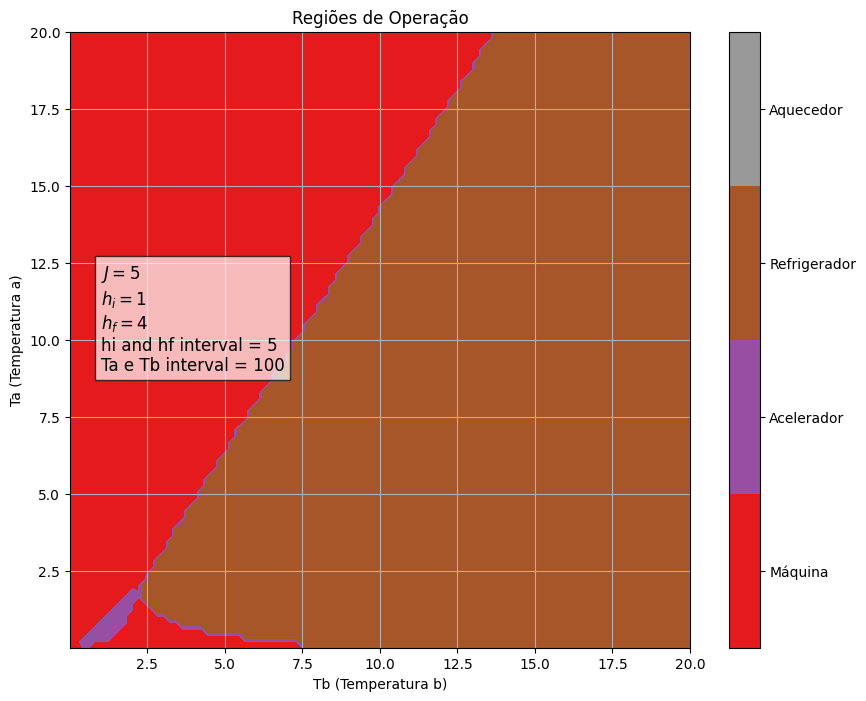

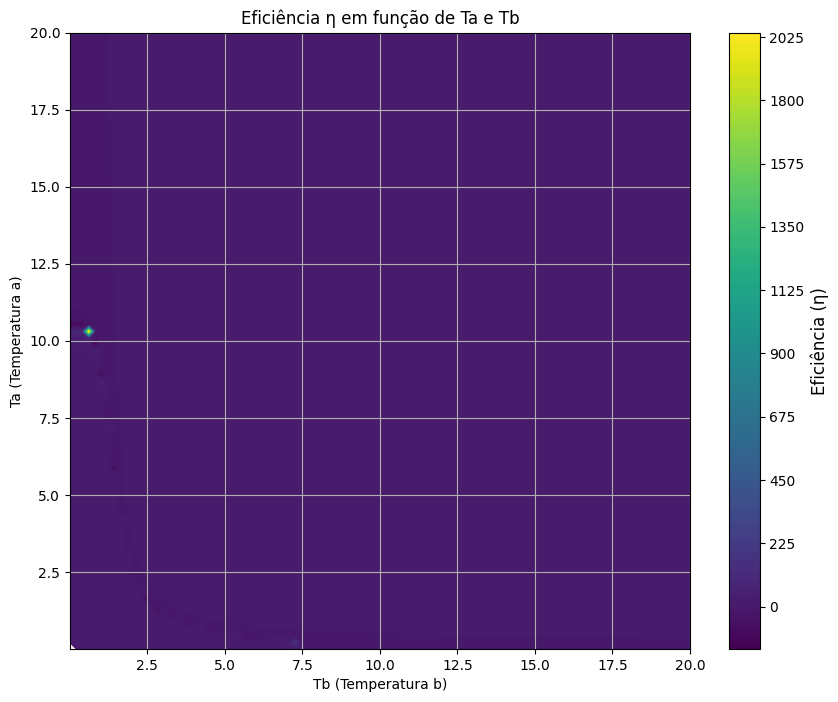

In [92]:
J = 5
hi = 1
hf = 4
INTERVAL = 5
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\675114907.py:76: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)
C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


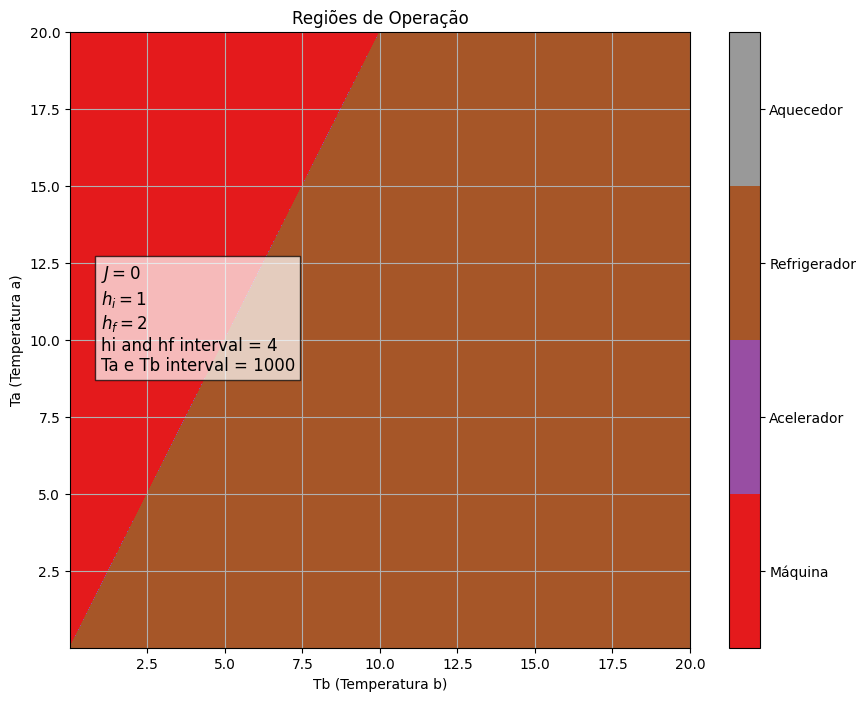

In [79]:
J = 0
hi = 1
hf = 2
INTERVAL = 4
IINTERVAL = 1000
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\675114907.py:76: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)
C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


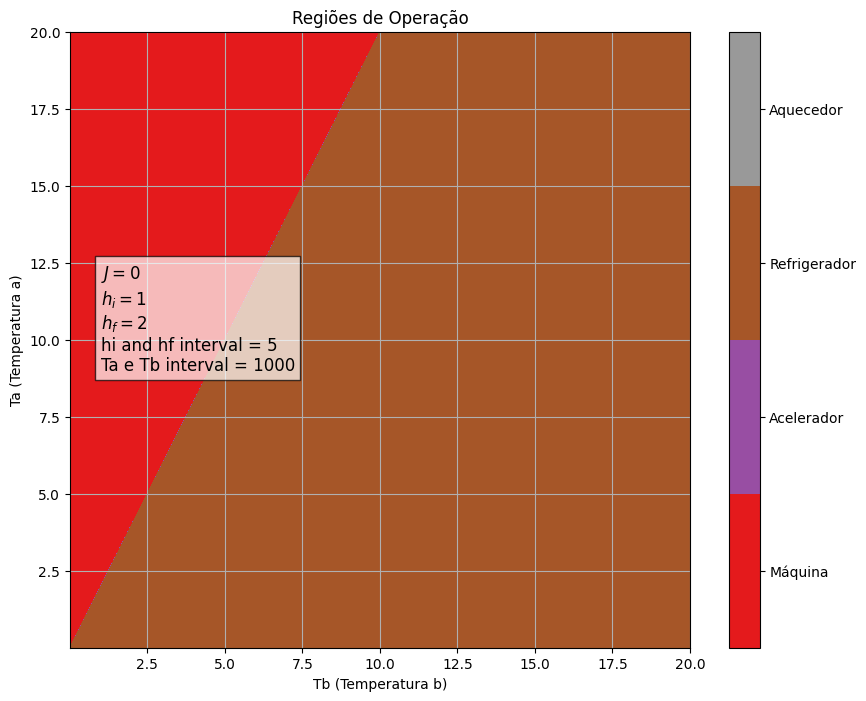

In [76]:
J = 0
hi = 1
hf = 2
INTERVAL = 5
IINTERVAL = 1000
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\675114907.py:76: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  calculated_temperature = fsolve(lambda temperature: Temp(J, temperature, magnetic_field, ENTROPY), temperature_guess)
C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


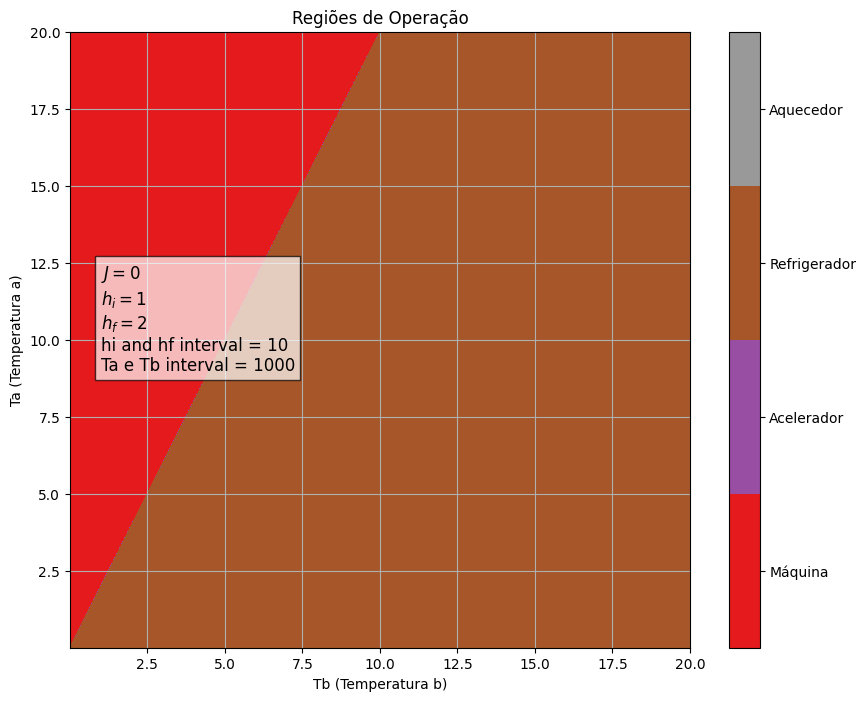

In [77]:
J = 0
hi = 1
hf = 2
INTERVAL = 10
IINTERVAL = 1000
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


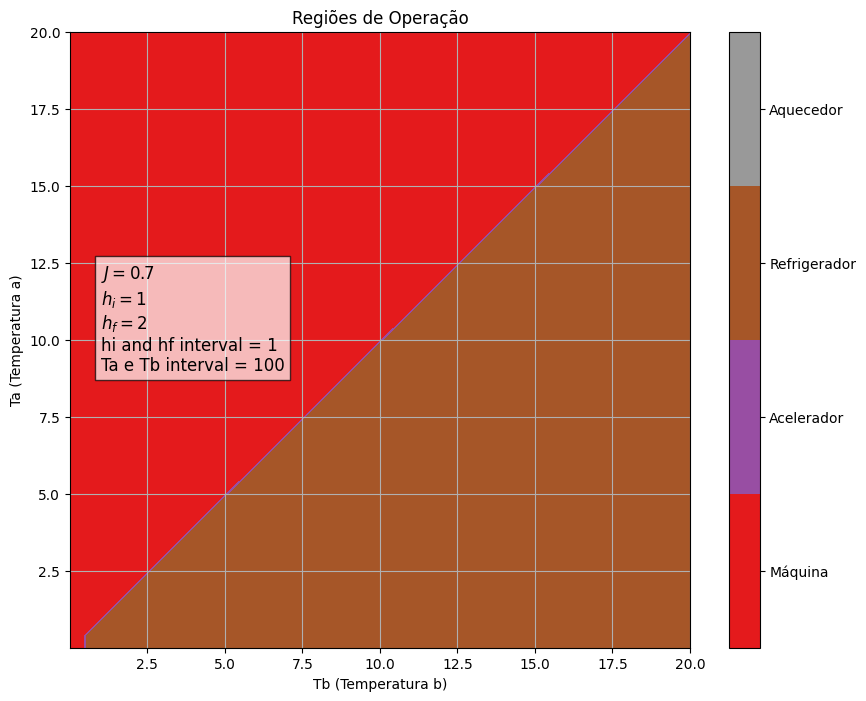

In [80]:
J = 0.7
hi = 1
hf = 2
INTERVAL = 1
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


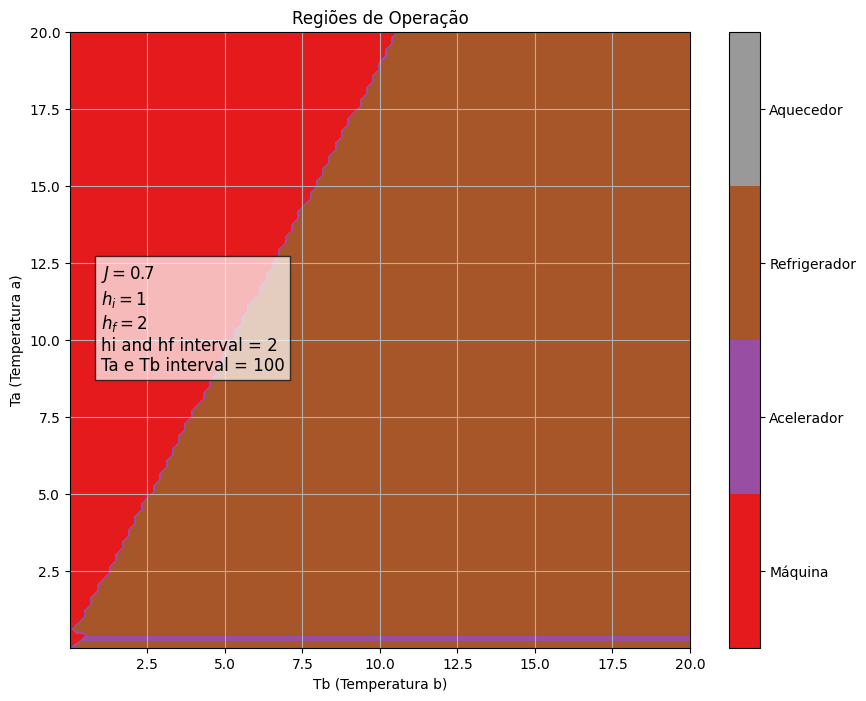

In [81]:
J = 0.7
hi = 1
hf = 2
INTERVAL = 2
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


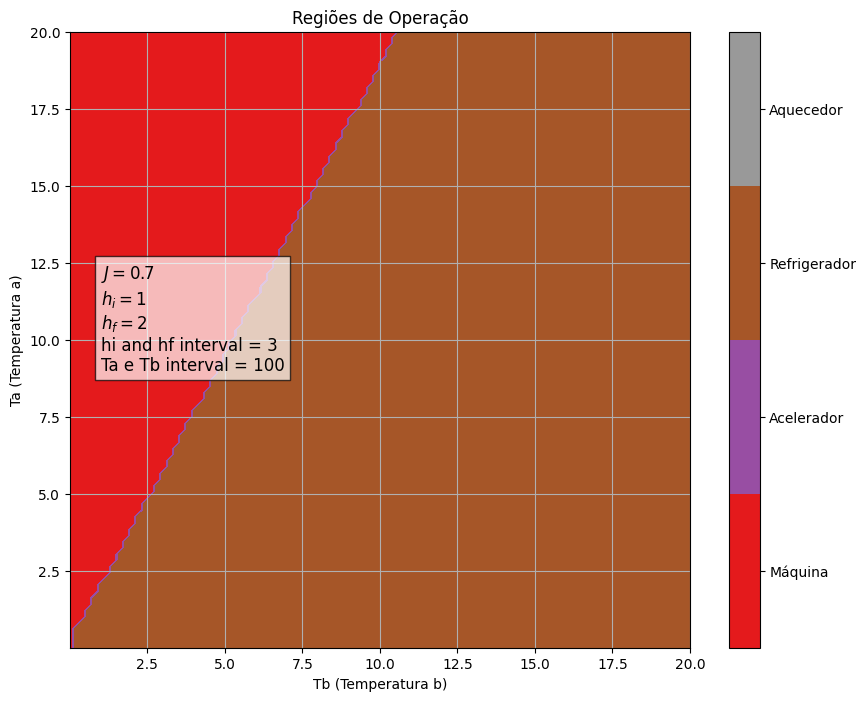

In [82]:
J = 0.7
hi = 1
hf = 2
INTERVAL = 3
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


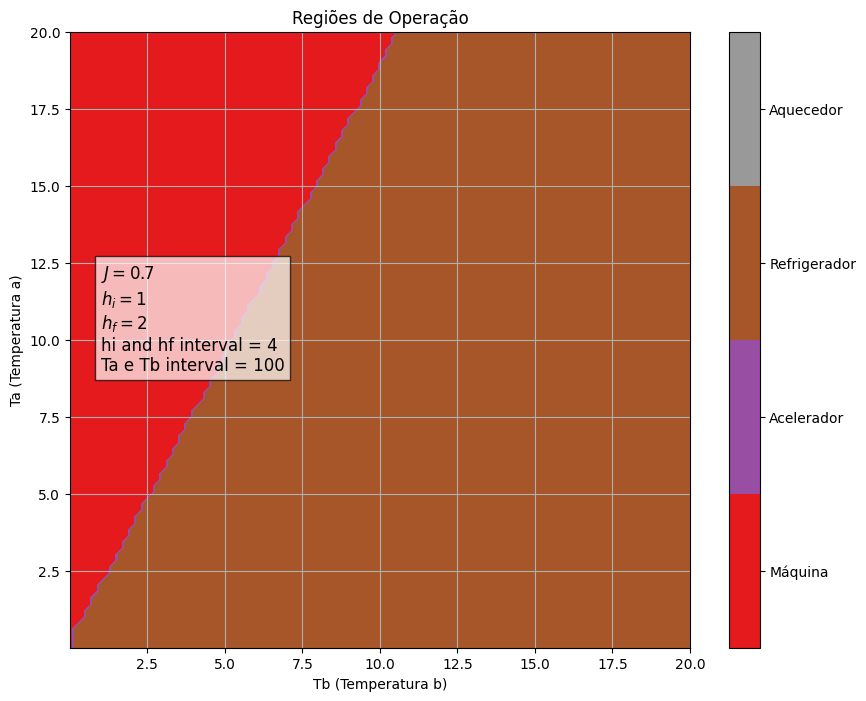

In [83]:
J = 0.7
hi = 1
hf = 2
INTERVAL = 4
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


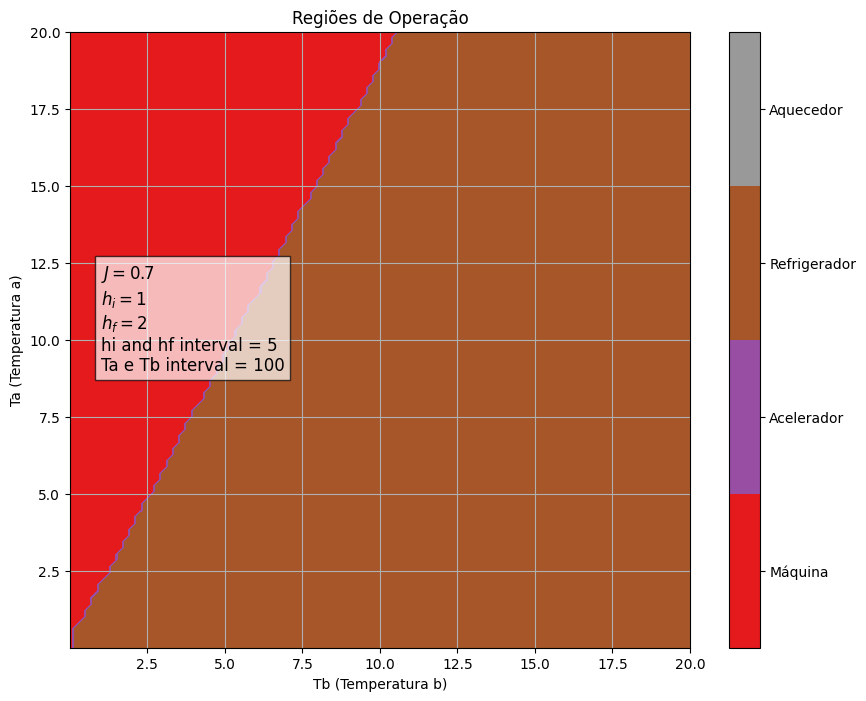

In [84]:
J = 0.7
hi = 1
hf = 2
INTERVAL = 5
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


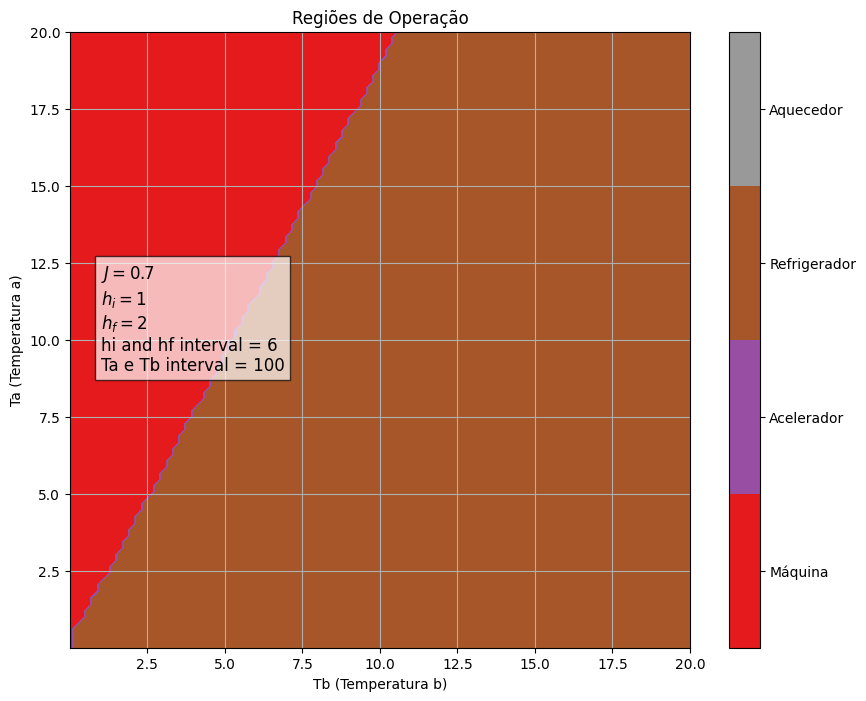

In [85]:
J = 0.7
hi = 1
hf = 2
INTERVAL = 6
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

C:\Users\bolar\AppData\Local\Temp\ipykernel_32892\3846445927.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 4)  # Paleta com 4 cores


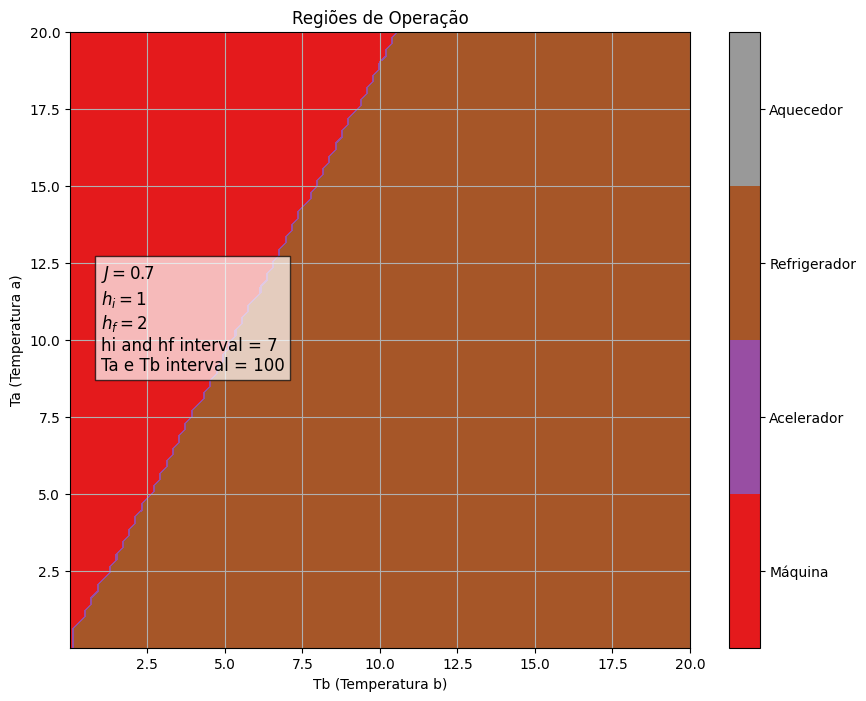

In [86]:
J = 0.7
hi = 1
hf = 2
INTERVAL = 7
IINTERVAL = 100
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTb(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)

In [18]:
def calcula_ponto(args):
    i, j, T_a, T_b, J, hi, hf, INTERVAL, initialOrFinal = args

    Ta = T_a[i]
    Tb = T_b[j]

    Wout, Win, Qhot, Qcold, add_Tc, add_Th = ciclo_Otto(J, hi, hf, Ta, Tb, INTERVAL, initialOrFinal)
    out_W, add_Tc = out_Work(J, hi, hf, Ta, INTERVAL, initialOrFinal)
    in_W, add_Th = in_Work(J, hi, hf, Tb, INTERVAL, initialOrFinal)
    Qhh = hot_Q(J, hi, Tb, add_Tc)
    Qcc = cold_Q(J, hf, Ta, add_Th)

    W = Win + Wout
    Qh = Qhot
    Qc = Qcold
    ETA = (abs(Wout) - abs(Win)) / Qhot if Qhot != 0 and not np.isnan(Qhot) and not np.isinf(Qhot) else np.nan

    return (i, j, W, Qh, Qc, ETA)


In [18]:
def calcula_ponto(args):
    i, j, Ta, Tb, J, hi, hf, INTERVAL, initialOrFinal = args

    Wout, Win, Qhot, Qcold, add_Tc, add_Th = ciclo_Otto(J, hi, hf, Ta, Tb, INTERVAL, initialOrFinal)
    
    
    W = Win - Wout
    Qh = Qhot
    Qc = Qcold
    ETA = (abs(Wout) - abs(Win)) / Qhot if Qhot != 0 and not np.isnan(Qhot) and not np.isinf(Qhot) else np.nan

    return (i, j, W, Qh, Qc, ETA)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from joblib import Parallel, delayed

def TaXTbMULTIPROSSESING(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f):
    # 3. Criar uma grade para Ta e Tb
    T_a = np.linspace(Ta_i, Ta_f, IINTERVAL)
    T_b = np.linspace(Tb_i, Tb_f, IINTERVAL)
    Ta_grid, Tb_grid = np.meshgrid(T_a, T_b)
    
    # Inicializar matrizes para W, Qh, Qc
    W = np.zeros_like(Ta_grid)
    Qh = np.zeros_like(Ta_grid)
    Qc = np.zeros_like(Ta_grid)
    ETA = np.zeros_like(Ta_grid)
    
    
    
    from joblib import Parallel, delayed

    resultados = Parallel(n_jobs=4)(
        delayed(calcula_ponto)((i, j, Ta_grid[i, j], Tb_grid[i, j], J, hi, hf, INTERVAL, initialOrFinal))
        for i in range(IINTERVAL)
        for j in range(IINTERVAL)
    )

    for i, j, W_, Qh_, Qc_, ETA_ in resultados:
        W[i, j] = W_
        Qh[i, j] = Qh_
        Qc[i, j] = Qc_
        ETA[i, j] = ETA_


    

    # 5. Identificar as regiões
    regions = np.zeros_like(W, dtype=float)
    
    # Máquina
    engine = ((W < 0))
    regions[engine] = 0


    # Refrigerador
    refrigerador = (((W > 0) & (Qh > 0) & (Qc < 0) & (Ta_grid < Tb_grid)) | ((W > 0) & (Qh < 0) & (Qc > 0) & (Ta_grid > Tb_grid)))
    regions[refrigerador] = 2

    # Acelerador
    acelerador = (((W > 0) & (Qc < 0) & (Ta_grid < Tb_grid)) | ((W > 0) & (Qh > 0) & (Ta_grid > Tb_grid)))
    regions[acelerador] = 1

    # Aquecedor
    regions[(W > 0) & (Qh < 0) & (Qc < 0)] = 3

    # 6. Plotar as regiões
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('Set1', 10)  # Paleta com 4 cores
    contour = plt.contourf(T_b, T_a, regions, levels=np.arange(5), cmap=cmap)
    
    
    
    
    # Intervalos desejados
    #intervalos_eta = [(i, i + 0.1) for i in np.arange(0.1, 0.9, 0.1)]
    #
    # Dicionário para guardar os valores médios por intervalo
    #medias_por_intervalo = {}
    #
    # Percorrer cada intervalo e calcular a média dos valores dentro dele
    #for (a, b) in intervalos_eta:
    #    valores_no_intervalo = ETA[(ETA >= a) & (ETA < b)]
        
    #    if valores_no_intervalo.size > 0:
    #        media = valores_no_intervalo.mean()
    #    else:
    #        media = np.nan  # Caso não haja valores no intervalo
    #    
    #    medias_por_intervalo[f"{a:.1f}–{b:.1f}"] = media




    # Adicionar barra de cores e legenda
    
    cbar = plt.colorbar(contour, ticks=[0.5, 1.5, 2.5, 3.5])
    cbar.ax.set_yticklabels(['Máquina', 'Acelerador', 'Refrigerador', 'Aquecedor'])

    # Adicionar os parâmetros no gráfico
    param_text = (
        f"$J = {J}$\n"
        f"$h_i = {hi}$\n"
        f"$h_f = {hf}$\n"
        f"hi and hf interval = {INTERVAL}\n"        
        f"Ta e Tb interval = {IINTERVAL}"
    )
    plt.text(1, 9, param_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.title("Regiões de Operação")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()
    
    # Plotar gráfico de eficiência ETA em função de Ta e Tb
    plt.figure(figsize=(10, 8))
    eta_plot = plt.contourf(T_b, T_a, ETA, levels=200, cmap='viridis')
    cbar_eta = plt.colorbar(eta_plot)
    cbar_eta.set_label("Eficiência (η)", fontsize=12)

    plt.title("Eficiência η em função de Ta e Tb")
    plt.xlabel("Tb (Temperatura b)")
    plt.ylabel("Ta (Temperatura a)")
    plt.grid(True)
    plt.show()

C:\Users\bolar\AppData\Local\Temp\ipykernel_21468\3421031658.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set1', 10)  # Paleta com 4 cores


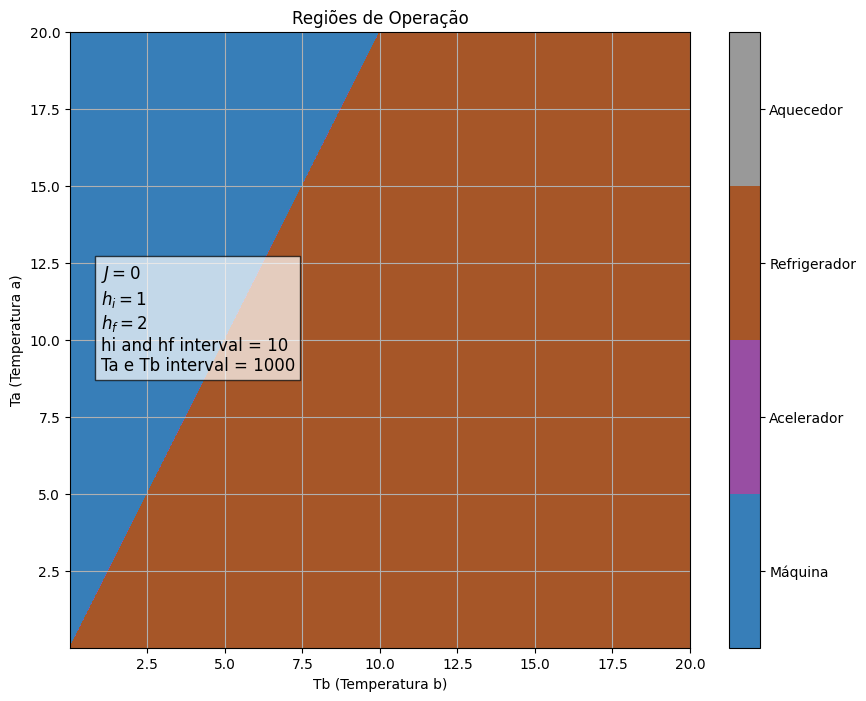

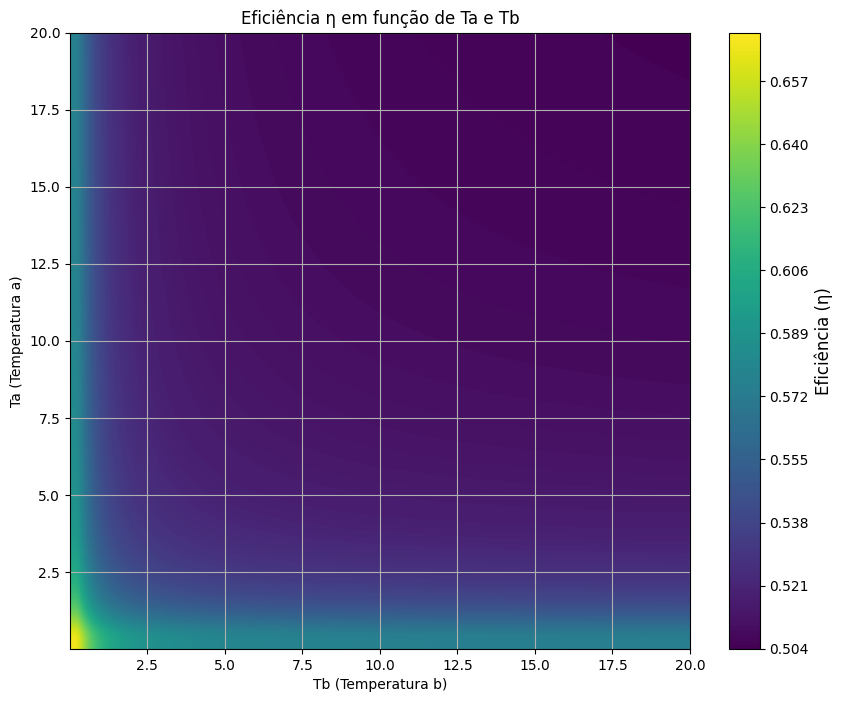

In [38]:
J = 0
hi = 1
hf = 2
INTERVAL = 10
IINTERVAL = 1000
initialOrFinal = -1
Ta_i = 0.01
Ta_f = 20
Tb_i = 0.01
Tb_f = 20

TaXTbMULTIPROSSESING(J, hi, hf, INTERVAL, IINTERVAL, initialOrFinal, Ta_i,Ta_f,Tb_i,Tb_f)